<center><h1>Wine quality Analysis</h1></center>

### Import Libraries

In [626]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from sklearn.svm import SVC, LinearSVC
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV



%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.dpi'] = 100   
plt.rcParams['savefig.dpi'] = 100

### Import csv files and turn them into datasets for the project

<center><h2>Red Wine quality Analysis</h2></center>

In [627]:
red_df = pd.read_csv('../wine_quality/winequality-red.csv', sep=';')
display(red_df.head())
display(red_df.tail())
red_df.shape
red_df.describe()
red_df.info()
red_df.isnull().sum() #---- find missing values


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [628]:
# Delete blanks and high cases
red_df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
red_df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [629]:
# Get the mean of each numeric column in red_df
red_means = red_df.select_dtypes(include=[np.number]).mean()
print(red_means)

fixed_acidity            8.319637
volatile_acidity         0.527821
citric_acid              0.270976
residual_sugar           2.538806
chlorides                0.087467
free_sulfur_dioxide     15.874922
total_sulfur_dioxide    46.467792
density                  0.996747
ph                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64


In [630]:
# create new column called "quality_label" and define a range and associate that range with a label name (low, medium, high)
red_df['quality_label'] = red_df['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# transform these labels into categrical data type (specific to pandas) instead of simple string
red_df['quality_label'] = pd.Categorical(red_df['quality_label'],
categories=['low', 'medium', 'high']) # matplotlib bar chart

red_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


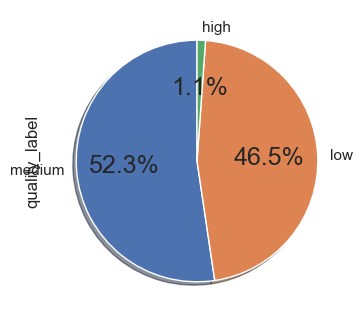

<Figure size 1200x800 with 0 Axes>

In [693]:
# Create a pie chart to show porcentages of bad, mid and high quality wines

red_df['quality_label'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=90)
# set the figure size
plt.figure(figsize=(12, 8))
plt.show()

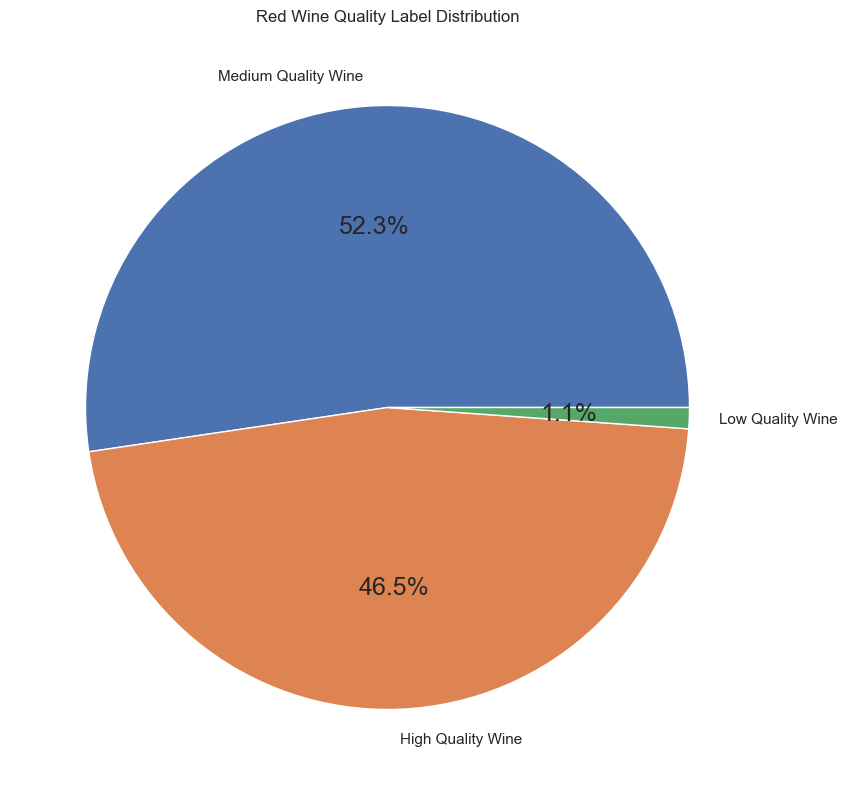

In [632]:
# Create a pie chart to show porcentages of bad, mid and high quality wines

# Get the counts of each quality label
red_counts = red_df['quality_label'].value_counts()

# adjust the size of the pie chart
plt.figure(figsize=(10,10))

# adjust the size of the text
plt.rcParams.update({'font.size': 18})

# change the name of the labels
red_counts.index = ['Medium Quality Wine', 'High Quality Wine', 'Low Quality Wine']

# Create a pie chart
plt.pie(red_counts, labels=red_counts.index, autopct='%1.1f%%')
plt.title('Red Wine Quality Label Distribution')
plt.show()

<center><h2>White Wine quality Analysis</h2></center>

In [633]:
# same for white wine quality
white_df = pd.read_csv('../wine_quality/winequality-white.csv', sep=';')
display(white_df.head())
display(white_df.tail())
white_df.shape
white_df.describe()
white_df.info()
white_df.isnull().sum() #----  find missing values

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [634]:
white_df = pd.read_csv('../wine_quality/winequality-white.csv', sep=';')
display(white_df.head())
display(white_df.tail())
white_df.shape
white_df.describe()
white_df.info()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [635]:
# Delete blanks and high cases
white_df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
white_df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [636]:
# Get the mean of each numeric column in white_df
white_means = white_df.select_dtypes(include=[np.number]).mean()
print(white_means)

fixed_acidity             6.854788
volatile_acidity          0.278241
citric_acid               0.334192
residual_sugar            6.391415
chlorides                 0.045772
free_sulfur_dioxide      35.308085
total_sulfur_dioxide    138.360657
density                   0.994027
ph                        3.188267
sulphates                 0.489847
alcohol                  10.514267
quality                   5.877909
dtype: float64


In [637]:
# create a column called "quality_label" and define a range and associate that range with a label name (low, medium, high)
white_df['quality_label'] = white_df['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

In [638]:
# transform these labels into categrical data type (specific to pandas) instead of simple string
white_df['quality_label'] = pd.Categorical(white_df['quality_label'],
categories=['low', 'medium', 'high'])

In [639]:
white_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium


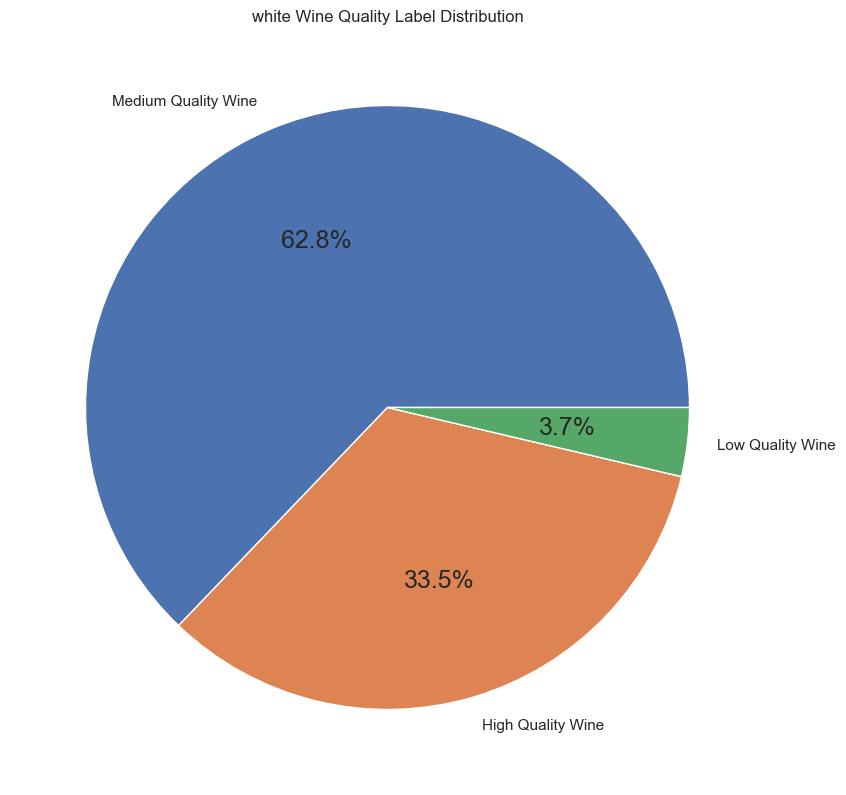

In [640]:
# Create a pie chart to show porcentages of bad, mid and high quality wines

# Get the counts of each quality label
white_counts = white_df['quality_label'].value_counts()

# adjust the size of the pie chart
plt.figure(figsize=(10,10))

# adjust the size of the text
plt.rcParams.update({'font.size': 18})

# change the name of the labels
white_counts.index = ['Medium Quality Wine', 'High Quality Wine', 'Low Quality Wine']

# Create a pie chart
plt.pie(white_counts, labels=white_counts.index, autopct='%1.1f%%')
plt.title('white Wine Quality Label Distribution')
plt.show()

<center><h3> Concatenate both types of wine data</center></h3>

In [641]:
# create a third dataset, in which we have both red and white wines together so we can compare it.
wine_concat = pd.concat([red_df, white_df])

wine_concat.head() 
wine_concat.shape
display(wine_concat.head())
display(wine_concat.tail())
wine_concat.info()
wine_concat.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,quality_label
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,medium


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         6497 non-null   float64 
 1   volatile_acidity      6497 non-null   float64 
 2   citric_acid           6497 non-null   float64 
 3   residual_sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free_sulfur_dioxide   6497 non-null   float64 
 6   total_sulfur_dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   ph                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  quality_label         6497 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 666.3 KB


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [642]:
display(wine_concat.describe())

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [643]:
# calculate the skewness of each numeric column in wine_quality
wine_concat.skew()
print(wine_concat.skew())

fixed_acidity           1.723290
volatile_acidity        1.495097
citric_acid             0.471731
residual_sugar          1.435404
chlorides               5.399828
free_sulfur_dioxide     1.220066
total_sulfur_dioxide   -0.001177
density                 0.503602
ph                      0.386839
sulphates               1.797270
alcohol                 0.565718
quality                 0.189623
dtype: float64


In [644]:
# calculate kurtosis of each numeric column in wine_quality
wine_concat.kurt()
print(wine_concat.kurt())

fixed_acidity            5.061161
volatile_acidity         2.825372
citric_acid              2.397239
residual_sugar           4.359272
chlorides               50.898051
free_sulfur_dioxide      7.906238
total_sulfur_dioxide    -0.371664
density                  6.606067
ph                       0.367657
sulphates                8.653699
alcohol                 -0.531687
quality                  0.232322
dtype: float64


#### Create a pie chart to show porcentages of bad, mid and high quality wine

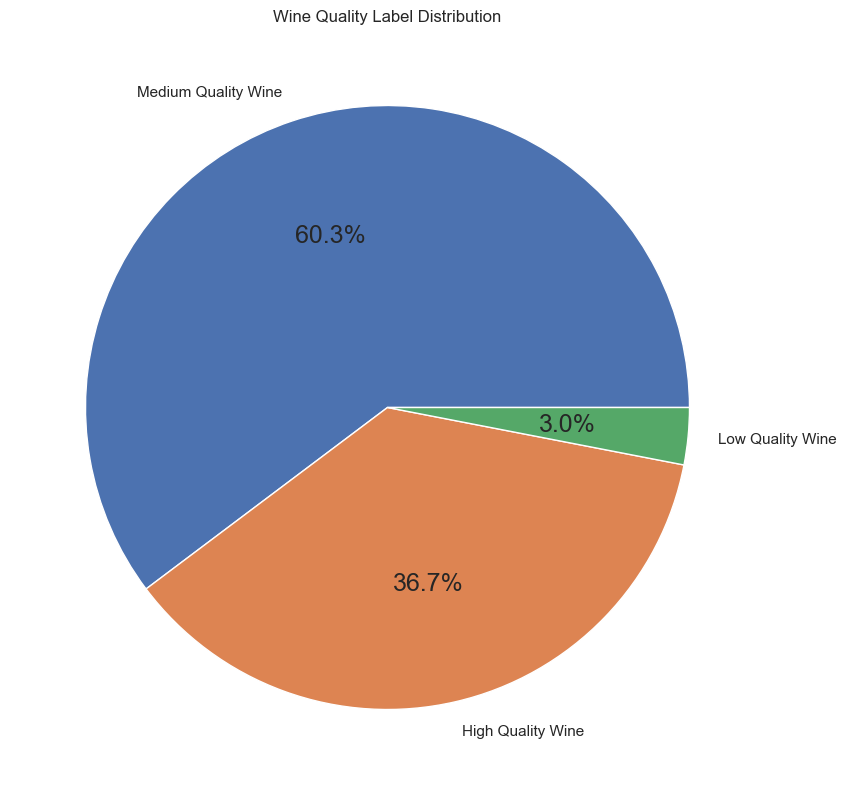

In [645]:
# Create a pie chart to show porcentages of bad, mid and high quality wines

# Get the counts of each quality label
wine_counts = wine_concat['quality_label'].value_counts()

# adjust the size of the pie chart
plt.figure(figsize=(10,10))

# adjust the size of the text
plt.rcParams.update({'font.size': 18})

# change the name of the labels
wine_counts.index = ['Medium Quality Wine', 'High Quality Wine', 'Low Quality Wine']

# Create a pie chart
plt.pie(quality_counts, labels=wine_counts.index, autopct='%1.1f%%')
plt.title('Wine Quality Label Distribution')
plt.show()


<center><h3> Exploratory Data Analysis of the concatenated table</center></h3>

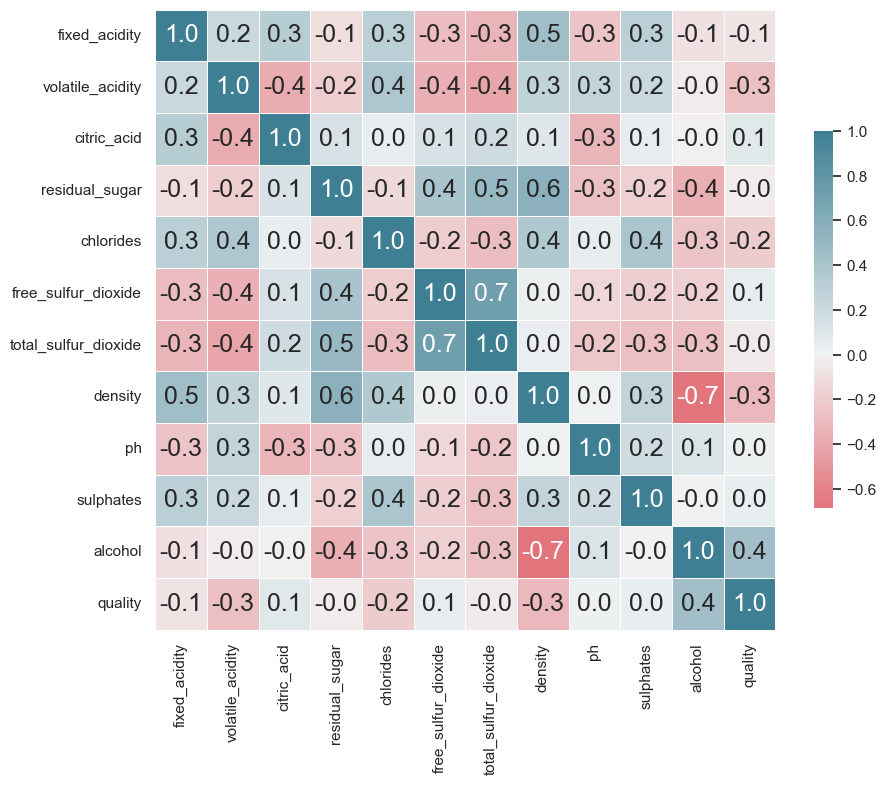

In [646]:
# Create a table like the one below to compare Descriptive Statistics between red and white wines.
pd.concat([red_df.describe(), white_df.describe()], axis=1, keys=["Red Wines Stats", "White Wines Stats"])
plt.figure(figsize=(10, 10))
corr = wine_concat.corr()
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, annot=True, fmt='.1f', cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#plt.xticks(rotation=45) # rotate x-axis labels
plt.show()


In [647]:
# find highly correlated features  about the comparison between red and white wine
corr_matrix = wine_concat.corr()
highly_correlated_features = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) >= 0.5:
            feature_pair = (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
            highly_correlated_features.append(feature_pair)

print("Highly correlated features:")
for feature_pair in highly_correlated_features:
    print(feature_pair[0], "and", feature_pair[1], "with correlation coefficient of", feature_pair[2])

Highly correlated features:
residual_sugar and density with correlation coefficient of 0.5525169502932384
free_sulfur_dioxide and total_sulfur_dioxide with correlation coefficient of 0.720934081378524
density and alcohol with correlation coefficient of -0.6867454216820781


<center><h3> Create first plots using seaborn</center></h3>

<h4> Pie Chart - Quantity of Red Wines vs. Quantity of White Wines</h4>

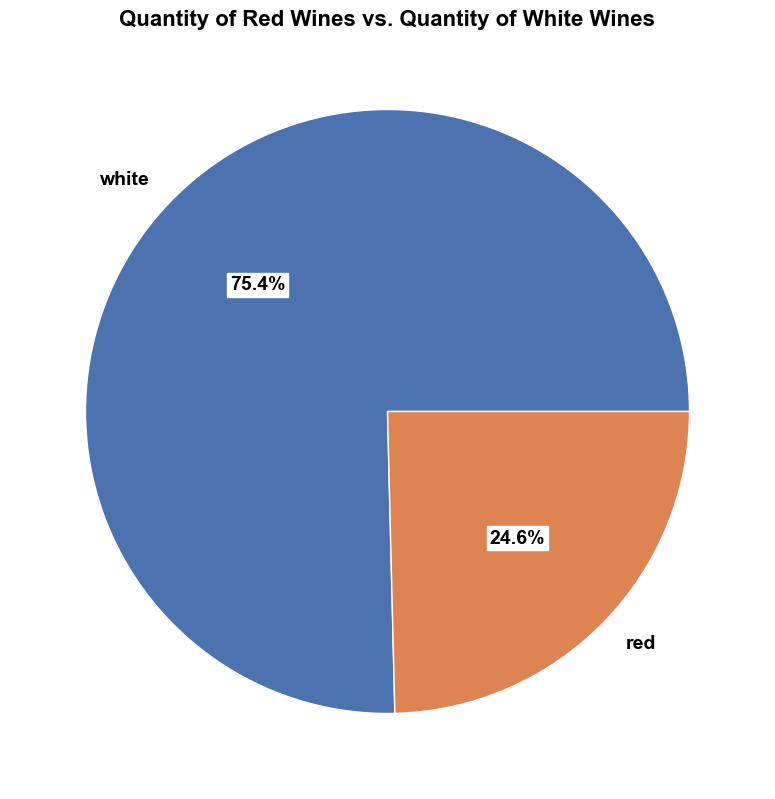

In [648]:
# create a pie chart showing the quantity of red wines compared to the quantity of white wines
red_df['type'] = 'red' # create a new column called "type" and assign a value of "red" to each row
white_df['type'] = 'white' # create a new column called "type" and assign a value of "white" to each row
wine_concat = pd.concat([red_df, white_df]) # create a new dataset called "wine_concat" that contains both red and white wines
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(wine_concat['type'].value_counts(), labels=wine_concat['type'].value_counts().index, autopct='%1.1f%%', textprops={'color': 'black', 'fontsize': 14, 'fontweight': 'bold', 'bbox': {'facecolor': 'white', 'edgecolor': 'white', 'pad': 2}})
ax.set_facecolor('xkcd:black')
plt.title('Quantity of Red Wines vs. Quantity of White Wines', color='black', fontsize=16, backgroundcolor='white', fontweight='bold')
plt.show()

<h4> Bar Plot - distribution of qualities</h4>

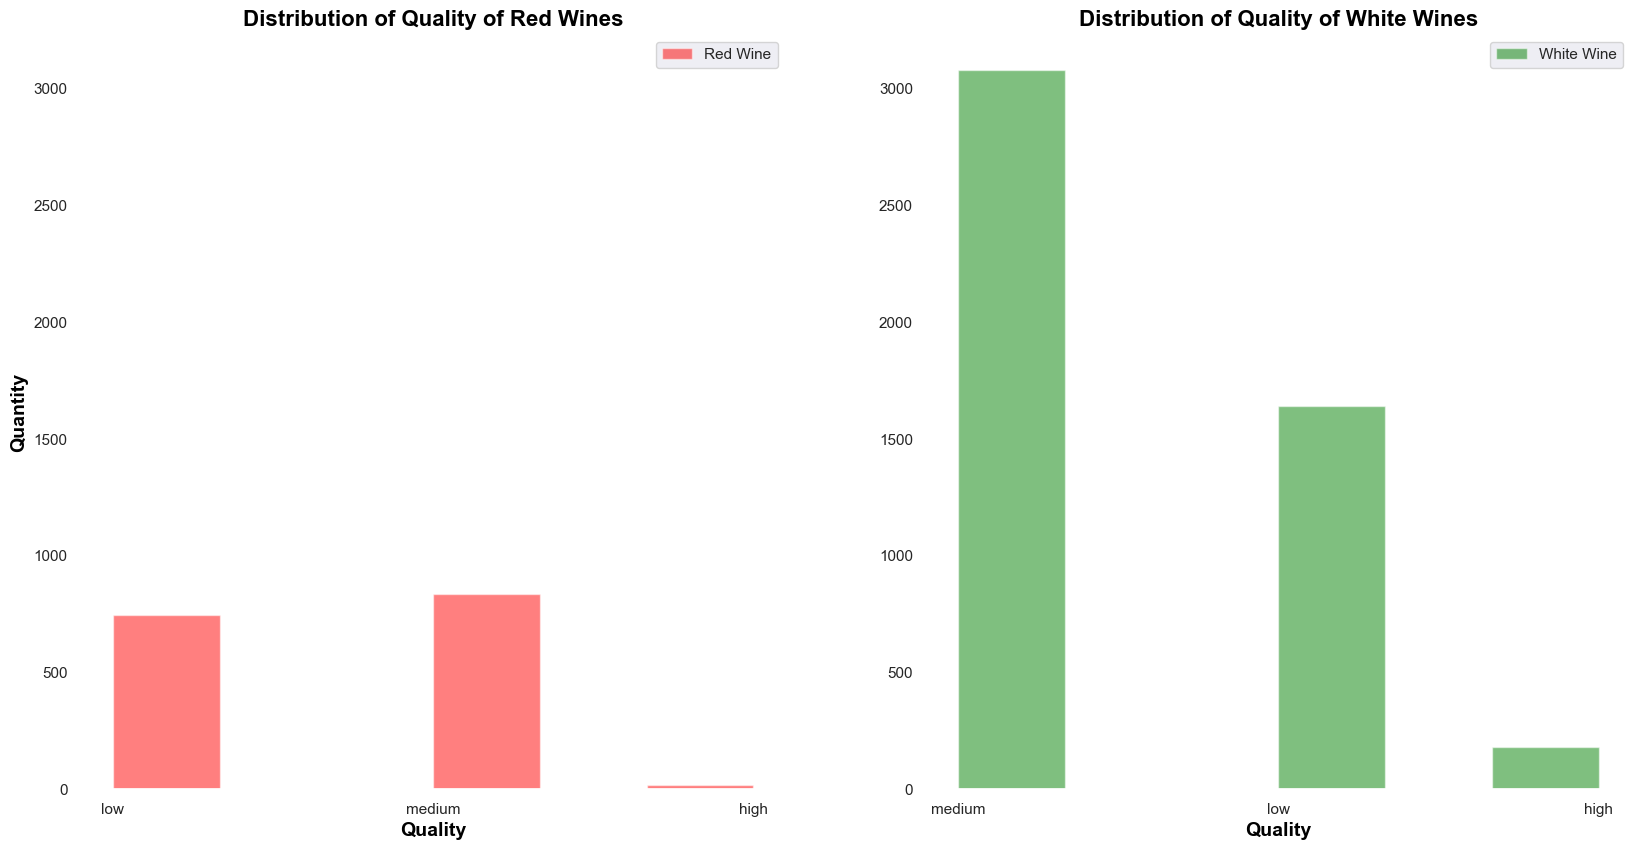

In [649]:
# create a plot to show the distribution of qualities of both wines
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))
ax1.hist(red_df['quality_label'], bins=6, alpha=0.5, label='Red Wine', color='red',align='mid', rwidth=2)
ax2.hist(white_df['quality_label'], bins=6, alpha=0.5, label='White Wine', color='green',align='mid', rwidth=2)
ax1.set_facecolor('xkcd:white')
ax2.set_facecolor('xkcd:white')
ax1.set_xlabel('Quality', color='black', fontsize=14, fontweight='bold')
ax2.set_xlabel('Quality', color='black', fontsize=14, fontweight='bold')
ax1.set_ylabel('Quantity', color='black', fontsize=14, fontweight='bold')
ax1.set_title('Distribution of Quality of Red Wines', color='black', fontsize=16, backgroundcolor='white', fontweight='bold')
ax2.set_title('Distribution of Quality of White Wines', color='black', fontsize=16, backgroundcolor='white', fontweight='bold')
ax1.legend()
ax2.legend()
# set the same y-axis limit for both subplots
ax1.set_ylim(ax2.get_ylim())

plt.show()

<h4>Seaborn histplot</h4>

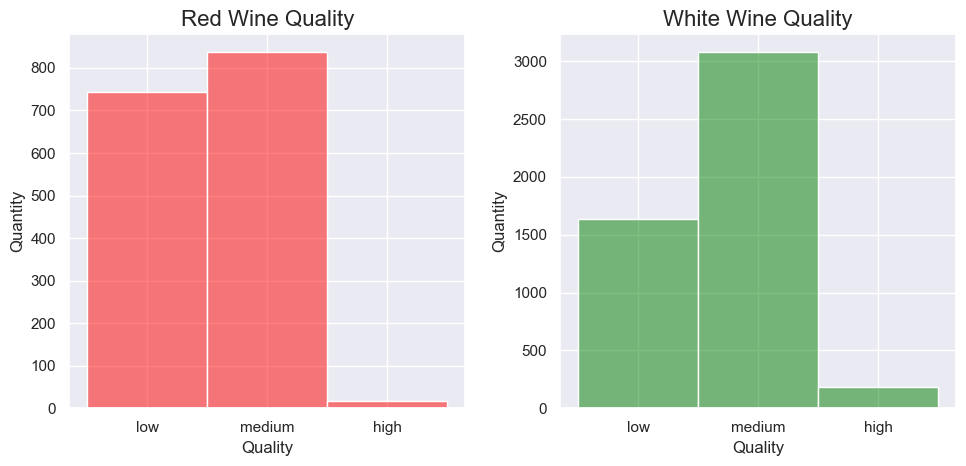

In [650]:
# create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# create a histogram plot for red wine quality in the first subplot
sns.histplot(data=red_df, x='quality_label', bins=6, alpha=0.5, color='red', ax=axs[0])
axs[0].set_title("Red Wine Quality", fontsize=16)
axs[0].set_xlabel("Quality", fontsize=12)
axs[0].set_ylabel("Quantity", fontsize=12)

# create a histogram plot for white wine quality in the second subplot
sns.histplot(data=white_df, x='quality_label', bins=6, alpha=0.5, color='green', ax=axs[1])
axs[1].set_title("White Wine Quality", fontsize=16)
axs[1].set_xlabel("Quality", fontsize=12)
axs[1].set_ylabel("Quantity", fontsize=12)

# adjust the layout of the subplots
plt.tight_layout()

# show the plot
plt.show()

<h4>Seaborn boxplotes of the feaures that have shown the biggest correlation in white and red wine </h4>

<h3>Red Wine</h3>

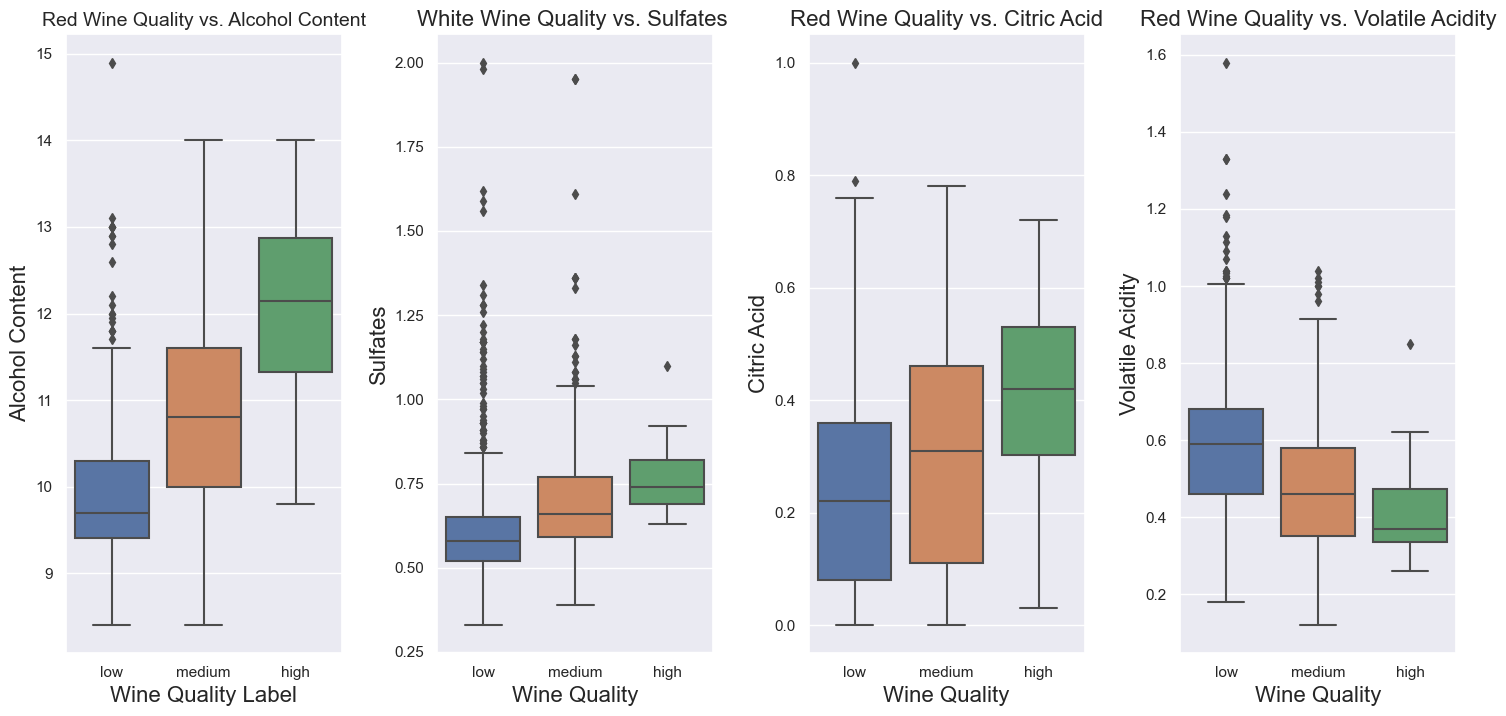

In [651]:
# Create figure with two subplots side by side
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(15, 7.5))

# Create first boxplot with wine alcohol content and quality for red wine
sns.boxplot(x='quality_label', y='alcohol', data=red_df, ax=ax1)
ax1.set_title('Red Wine Quality vs. Alcohol Content', fontsize=14)
ax1.set_xlabel('Wine Quality Label', fontsize=16)
ax1.set_ylabel('Alcohol Content', fontsize=16)

# Create second boxplot with wine sulfates and quality for red wine
sns.boxplot(x='quality_label', y='sulphates', data=red_df, ax=ax2)
ax2.set_title('White Wine Quality vs. Sulfates ', fontsize=16)
ax2.set_xlabel('Wine Quality', fontsize=16)
ax2.set_ylabel('Sulfates', fontsize=16)

#create third boxplot with citric acid content and quality for red wine

sns.boxplot(x='quality_label', y='citric_acid', data=red_df, ax=ax3)

ax3.set_title('Red Wine Quality vs. Citric Acid', fontsize=16)
ax3.set_xlabel('Wine Quality', fontsize=16)
ax3.set_ylabel('Citric Acid', fontsize=16)

# Create fourth boxplot with volatile acidity and quality for red wine
sns.boxplot(x='quality_label', y='volatile_acidity', data=red_df, ax=ax4)

ax4.set_title('Red Wine Quality vs. Volatile Acidity', fontsize=16)

ax4.set_xlabel('Wine Quality', fontsize=16)
ax4.set_ylabel('Volatile Acidity', fontsize=16)

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plots
plt.show()

In [652]:
# calculate the skewness of the red wine quality dataset
skewness = red_df.skew()
print(skewness)

fixed_acidity           0.982751
volatile_acidity        0.671593
citric_acid             0.318337
residual_sugar          4.540655
chlorides               5.680347
free_sulfur_dioxide     1.250567
total_sulfur_dioxide    1.515531
density                 0.071288
ph                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64


In [653]:
# calculate kurtosis of the red wine quality dataset
kurtosis = red_df.kurt()
print(kurtosis)

fixed_acidity            1.132143
volatile_acidity         1.225542
citric_acid             -0.788998
residual_sugar          28.617595
chlorides               41.715787
free_sulfur_dioxide      2.023562
total_sulfur_dioxide     3.809824
density                  0.934079
ph                       0.806943
sulphates               11.720251
alcohol                  0.200029
quality                  0.296708
dtype: float64


<h3>White Wine</h3>

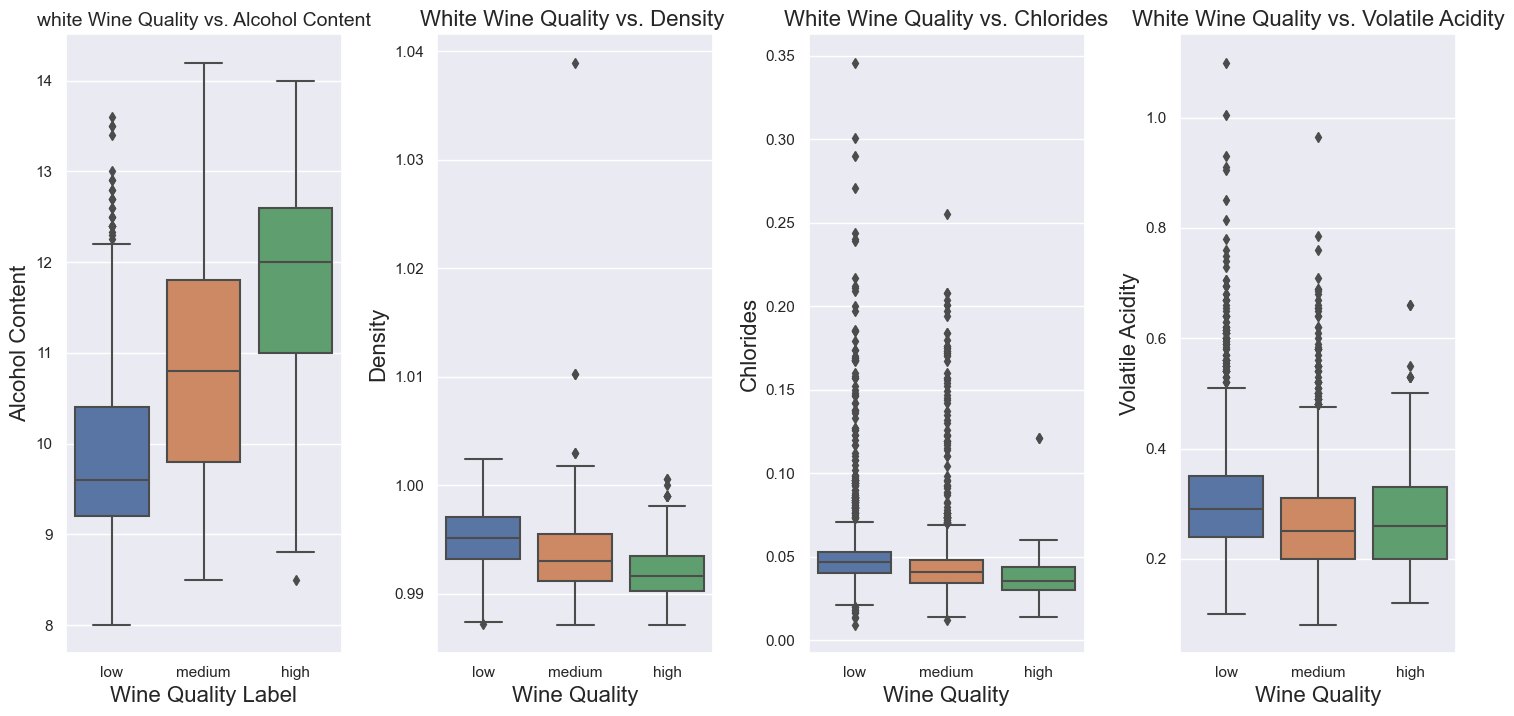

In [654]:
# Create figure with two subplots side by side
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(15, 7.5))

# Create first boxplot with wine alcohol content and quality for white wine
sns.boxplot(x='quality_label', y='alcohol', data=white_df, ax=ax1)
ax1.set_title('white Wine Quality vs. Alcohol Content', fontsize=14)
ax1.set_xlabel('Wine Quality Label', fontsize=16)
ax1.set_ylabel('Alcohol Content', fontsize=16)

# Create second boxplot with wine density and quality for white wine
sns.boxplot(x='quality_label', y='density', data=white_df, ax=ax2)
ax2.set_title('White Wine Quality vs. Density ', fontsize=16)
ax2.set_xlabel('Wine Quality', fontsize=16)
ax2.set_ylabel('Density', fontsize=16)

#create third boxplot with chlorides content and quality for white wine

sns.boxplot(x='quality_label', y='chlorides', data=white_df, ax=ax3)
ax3.set_title('White Wine Quality vs. Chlorides', fontsize=16)
ax3.set_xlabel('Wine Quality', fontsize=16)
ax3.set_ylabel('Chlorides', fontsize=16)

# Create fourth boxplot with volatile acidity and quality for white wine
sns.boxplot(x='quality_label', y='volatile_acidity', data=white_df, ax=ax4)
ax4.set_title('White Wine Quality vs. Volatile Acidity', fontsize=16)
ax4.set_xlabel('Wine Quality', fontsize=16)
ax4.set_ylabel('Volatile Acidity', fontsize=16)

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plots
plt.show()

In [655]:
# calculate the skewness of the white wine quality dataset
skewness = white_df.skew()
print(skewness)


fixed_acidity           0.647751
volatile_acidity        1.576980
citric_acid             1.281920
residual_sugar          1.077094
chlorides               5.023331
free_sulfur_dioxide     1.406745
total_sulfur_dioxide    0.390710
density                 0.977773
ph                      0.457783
sulphates               0.977194
alcohol                 0.487342
quality                 0.155796
dtype: float64


In [656]:
# calculate kurtosis of the white wine quality dataset
kurtosis = white_df.kurt()
print(kurtosis)

fixed_acidity            2.172178
volatile_acidity         5.091626
citric_acid              6.174901
residual_sugar           3.469820
chlorides               37.564600
free_sulfur_dioxide     11.466342
total_sulfur_dioxide     0.571853
density                  9.793807
ph                       0.530775
sulphates                1.590930
alcohol                 -0.698425
quality                  0.216526
dtype: float64


<center><h2>Univariate Analysis</center></h2>

<h3>Red Wine</h3>

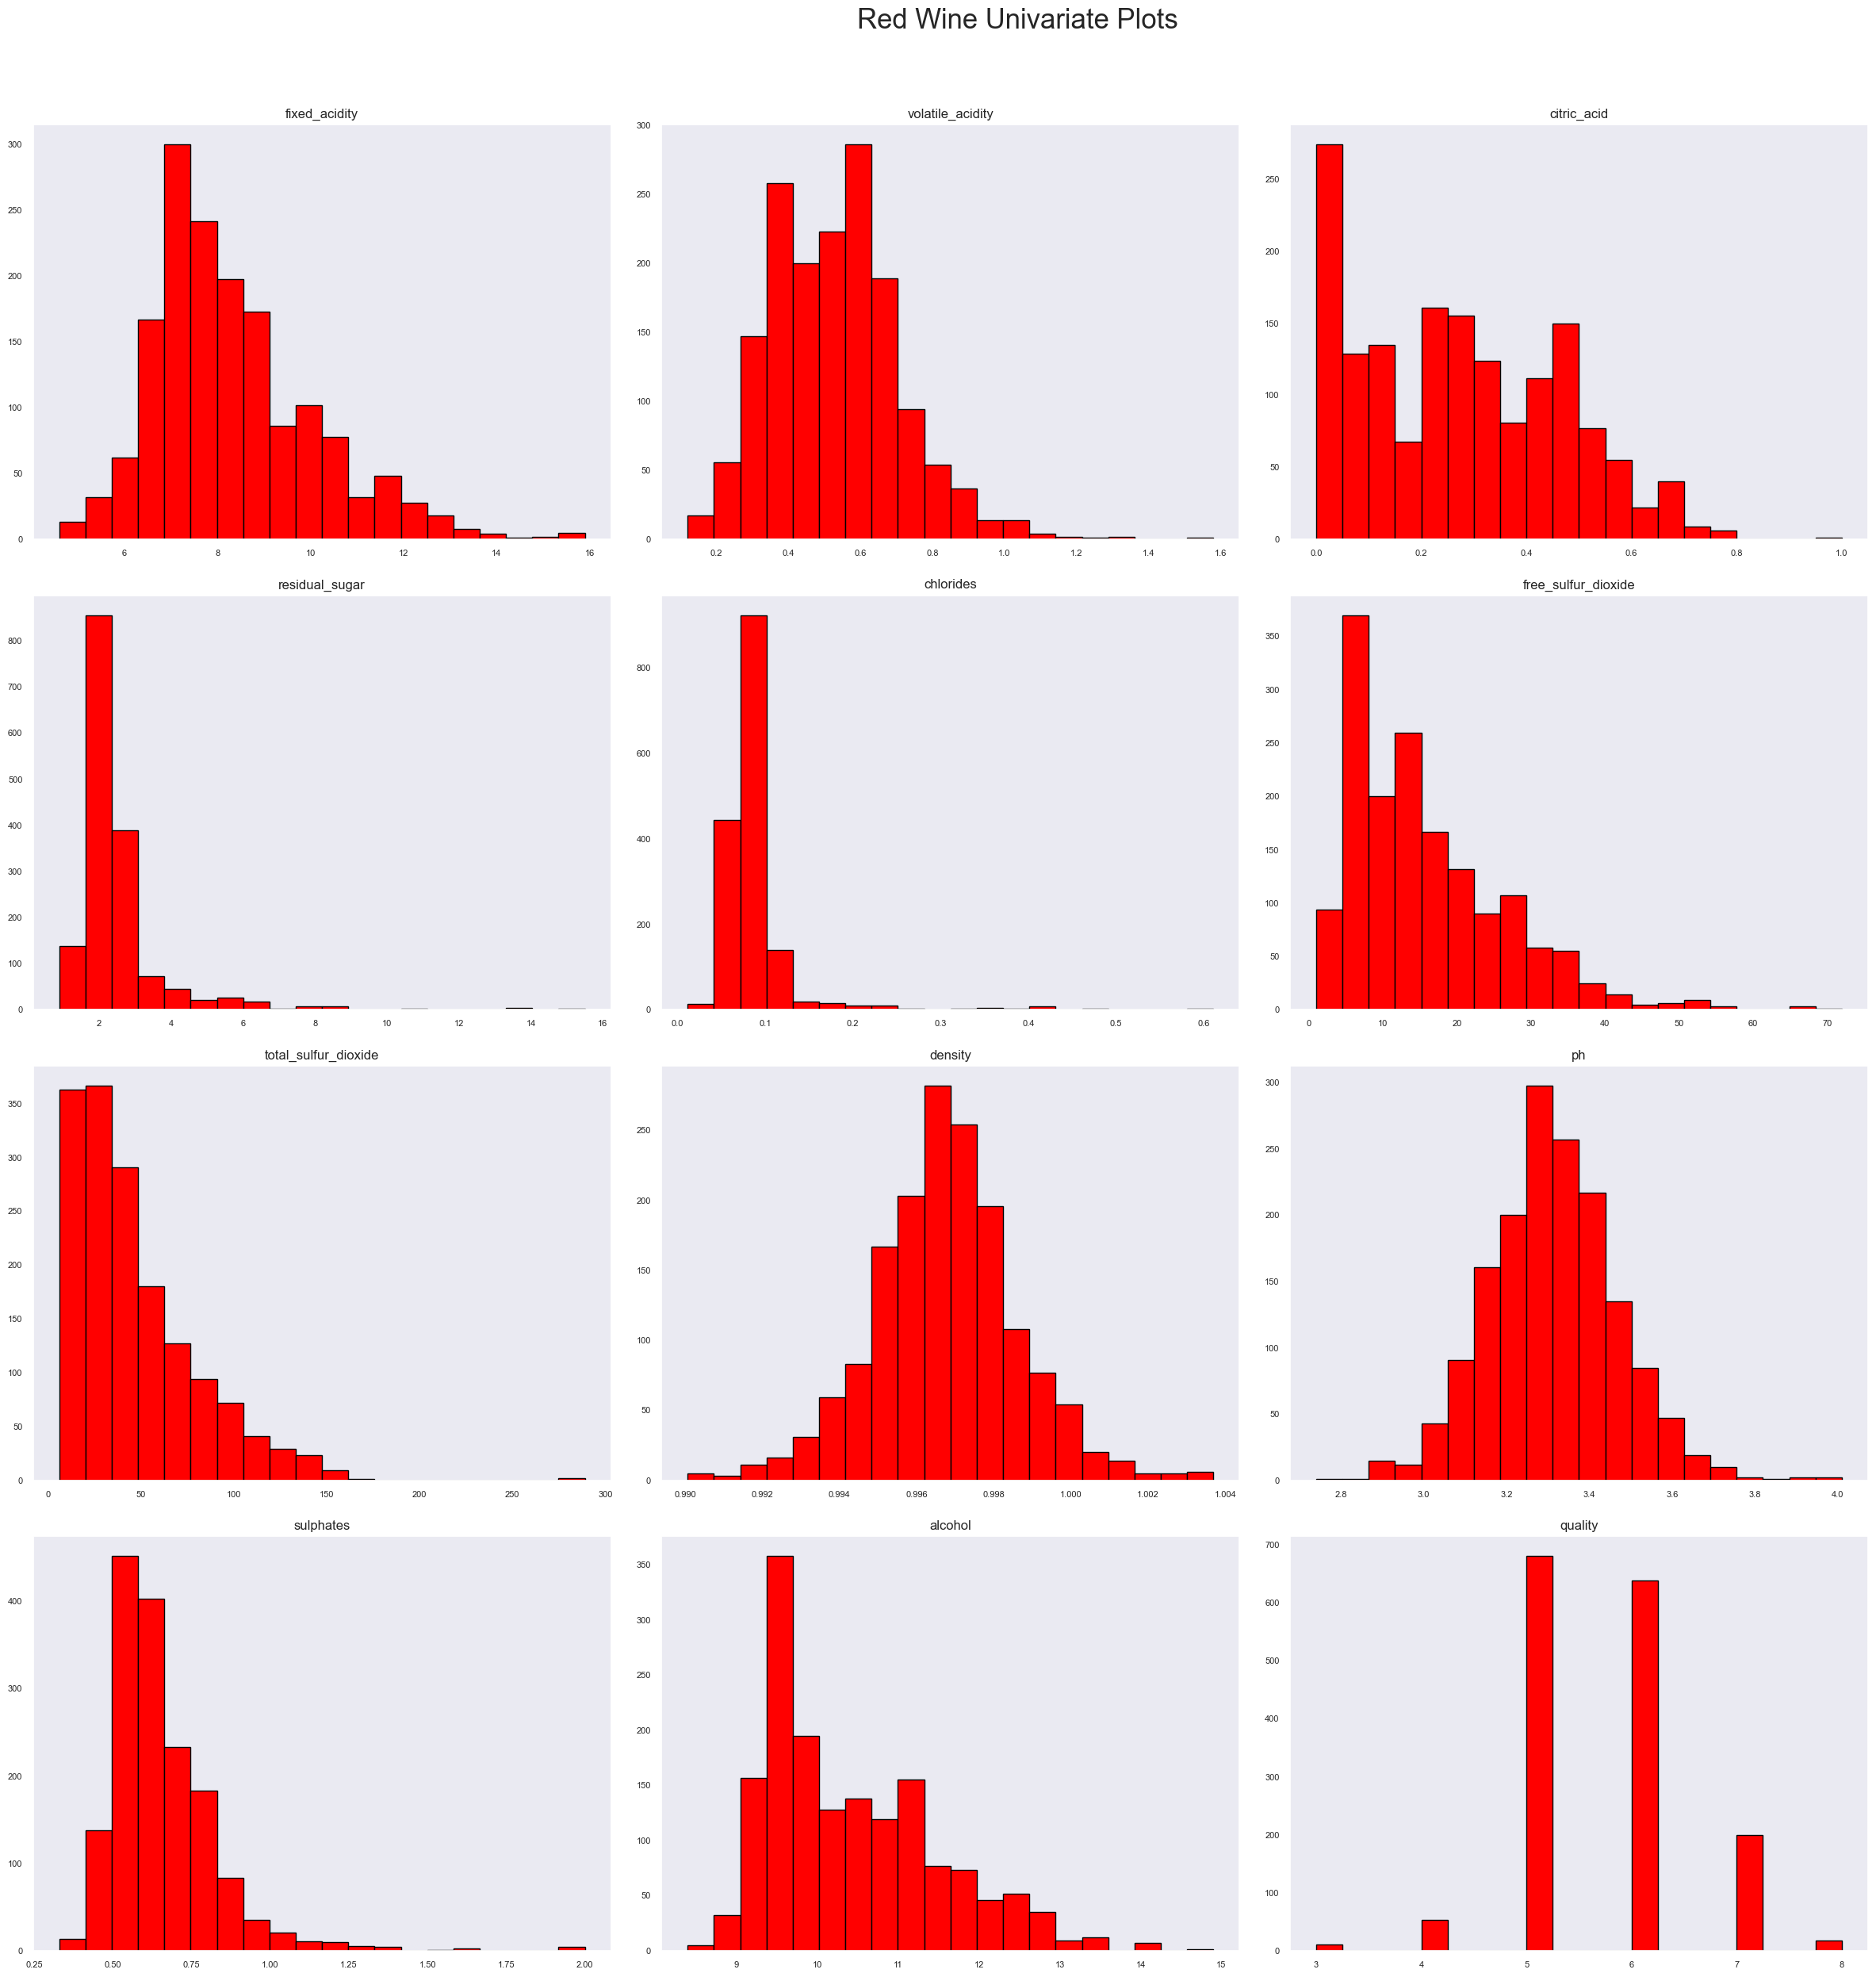

In [657]:
# visualize distributions of data values for all features.
# create a figure with 12 subplots, one for each feature
# set the figure size to 20 inches by 20 inches

red_df.hist(figsize=(20,20), bins=20, color='red', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))


rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=25)

<h3>White Wine</h3>

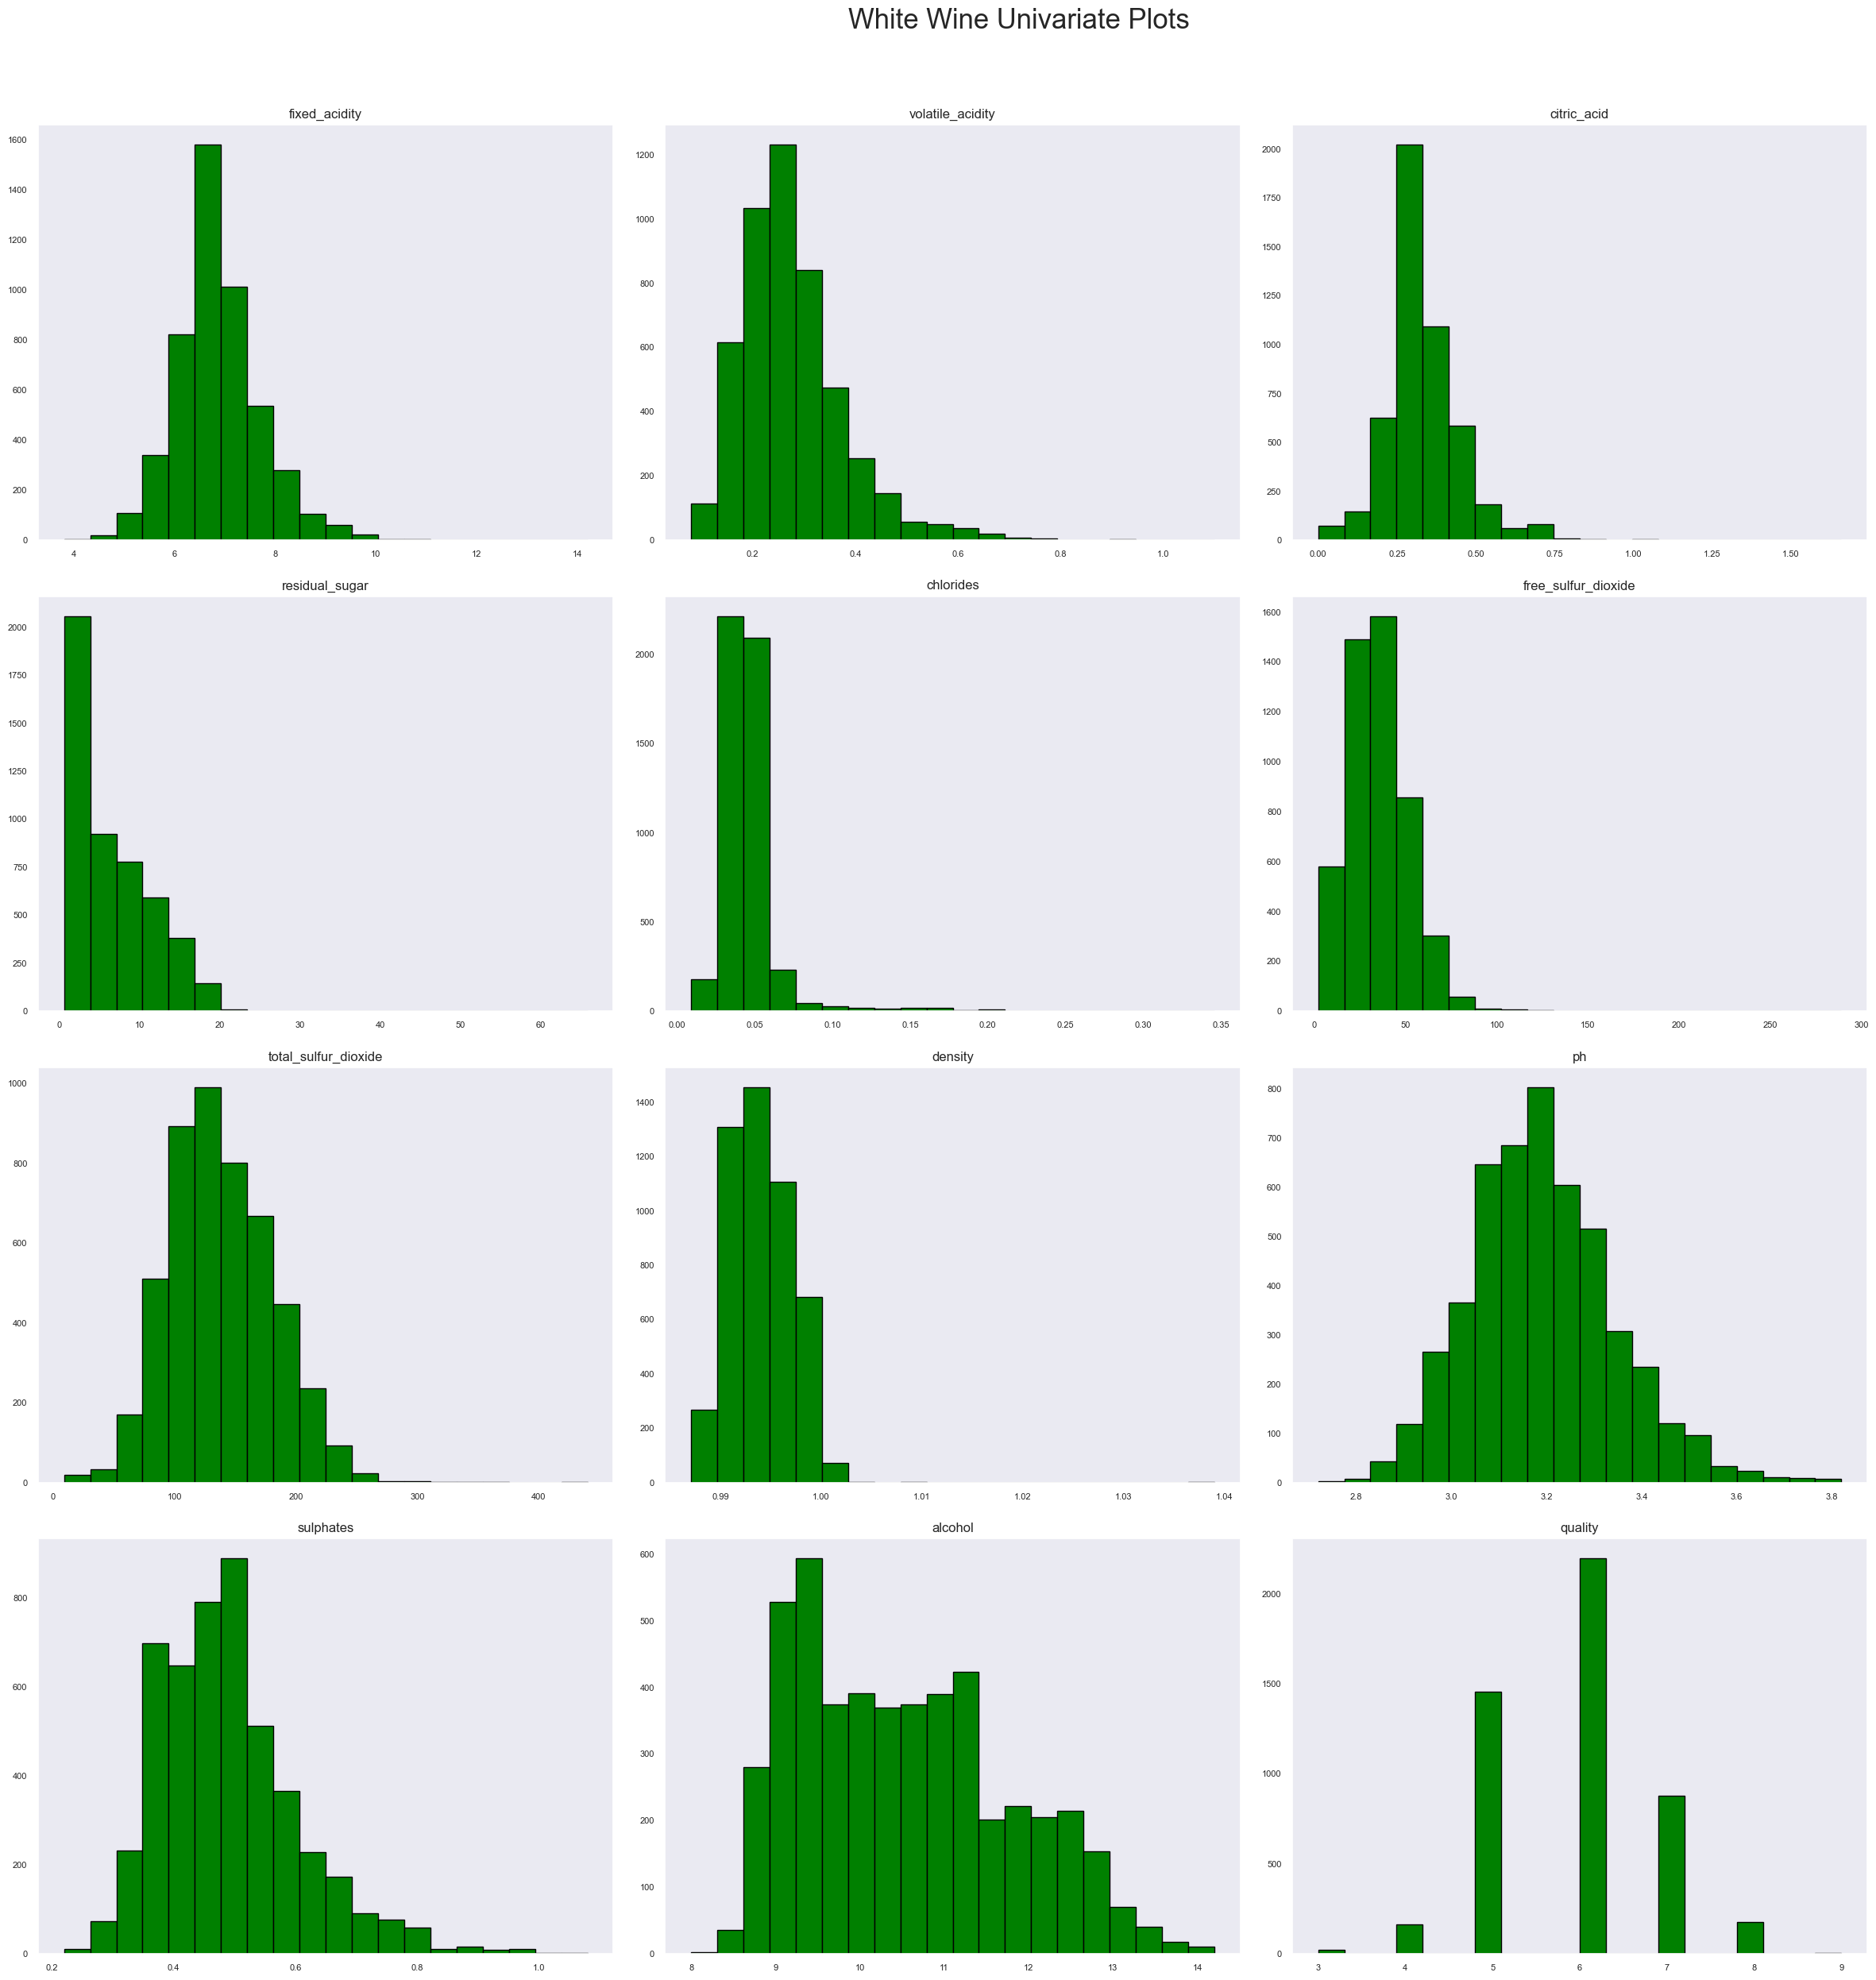

In [658]:
white_df.hist(figsize=(20,20), bins=20, color='green', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)


plt.tight_layout(rect=(0, 0, 1.2, 1.2))


rt = plt.suptitle('White Wine Univariate Plots', x=0.65, y=1.25, fontsize=25)

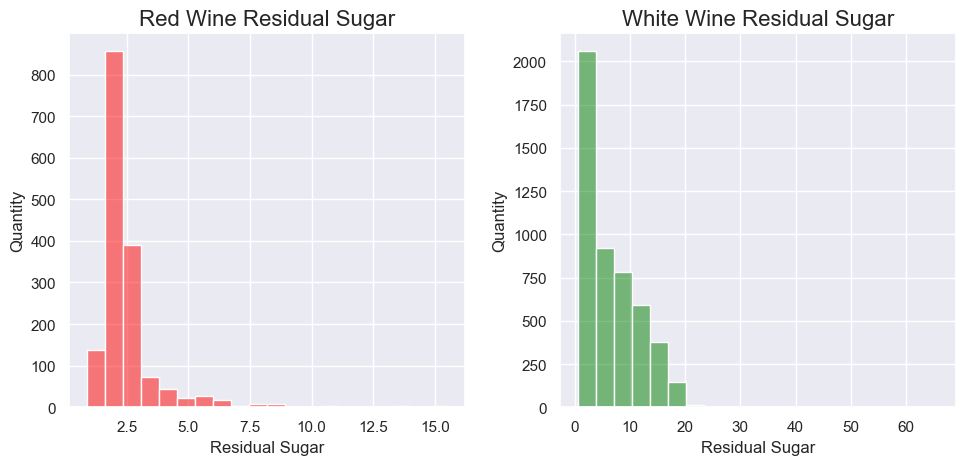

In [659]:
# take the feature named residual sugar and plot the distributions across data pertaining to red and white wine samples.

# create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))



# create a histogram plot for residual sugar in the first subplot


sns.histplot(data=red_df, x='residual_sugar', bins=20, alpha=0.5, color='red', ax=axs[0])
axs[0].set_title("Red Wine Residual Sugar", fontsize=16)

axs[0].set_xlabel("Residual Sugar", fontsize=12)
axs[0].set_ylabel("Quantity", fontsize=12)



# create a histogram plot for residual sugar in the second subplot


sns.histplot(data=white_df, x='residual_sugar', bins=20, alpha=0.5, color='green', ax=axs[1])
axs[1].set_title("White Wine Residual Sugar", fontsize=16)


axs[1].set_xlabel("Residual Sugar", fontsize=12)
axs[1].set_ylabel("Quantity", fontsize=12)



# adjust the layout of the subplots
plt.tight_layout()



# show the plot
plt.show()


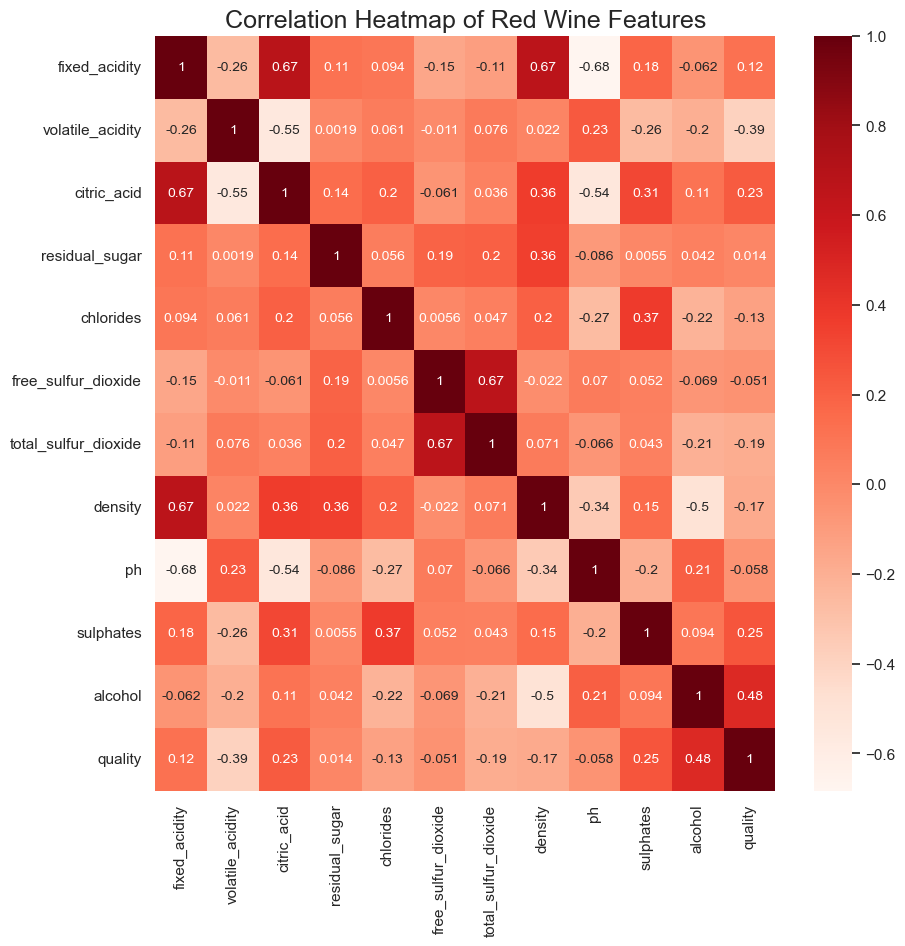

In [660]:
# build a pairwise correlation plot depicting the correlation coefficient between each pair of features in the dataset

# create a figure with a single subplot
fig, ax = plt.subplots(figsize=(10, 10))

# compute the correlation matrix
corr = red_df.corr()

# plot the correlation matrix


sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='Reds',annot=True, annot_kws={"size": 10},
            ax=ax)

# set the title of the plot
ax.set_title('Correlation Heatmap of Red Wine Features', fontsize=18)

# show the plot
plt.show()

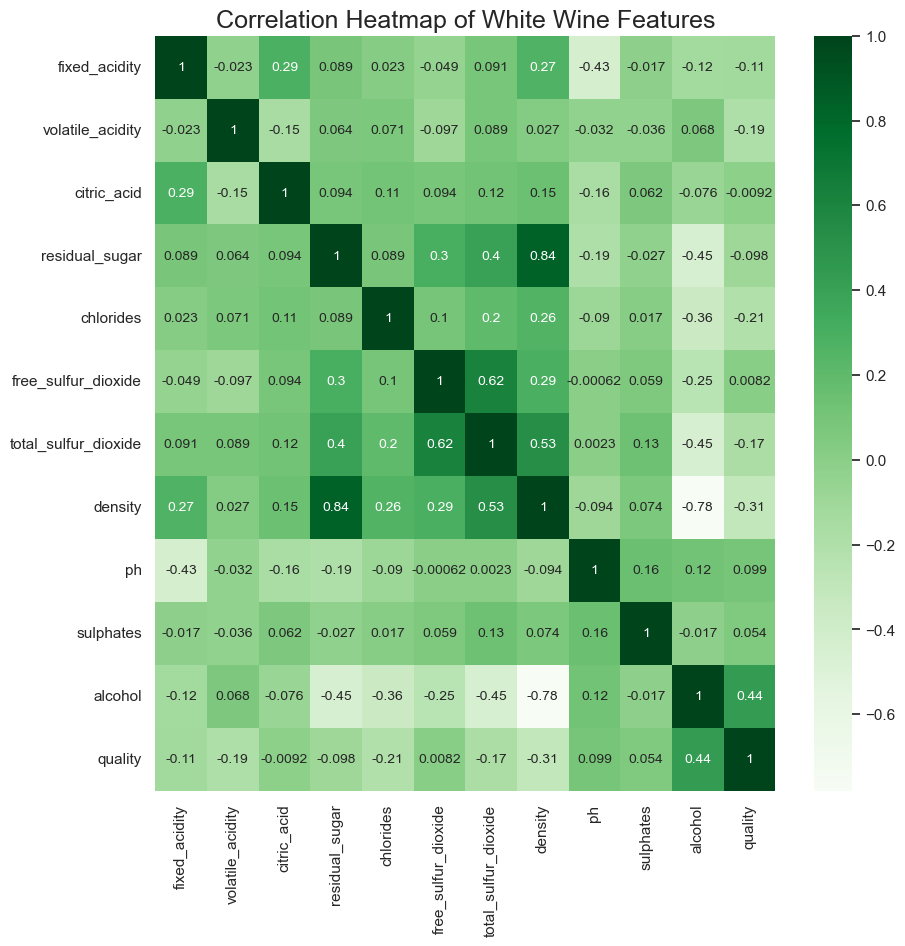

In [661]:
# build a pairwise correlation plot depicting the correlation coefficient between each pair of features in the dataset

# create a figure with a single subplot
fig, ax = plt.subplots(figsize=(10, 10))

# compute the correlation matrix
corr = white_df.corr()

# plot the correlation matrix


sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='Greens', annot=True, annot_kws={"size": 10},
            ax=ax)

# set the title of the plot
ax.set_title('Correlation Heatmap of White Wine Features', fontsize=18)

# show the plot
plt.show()

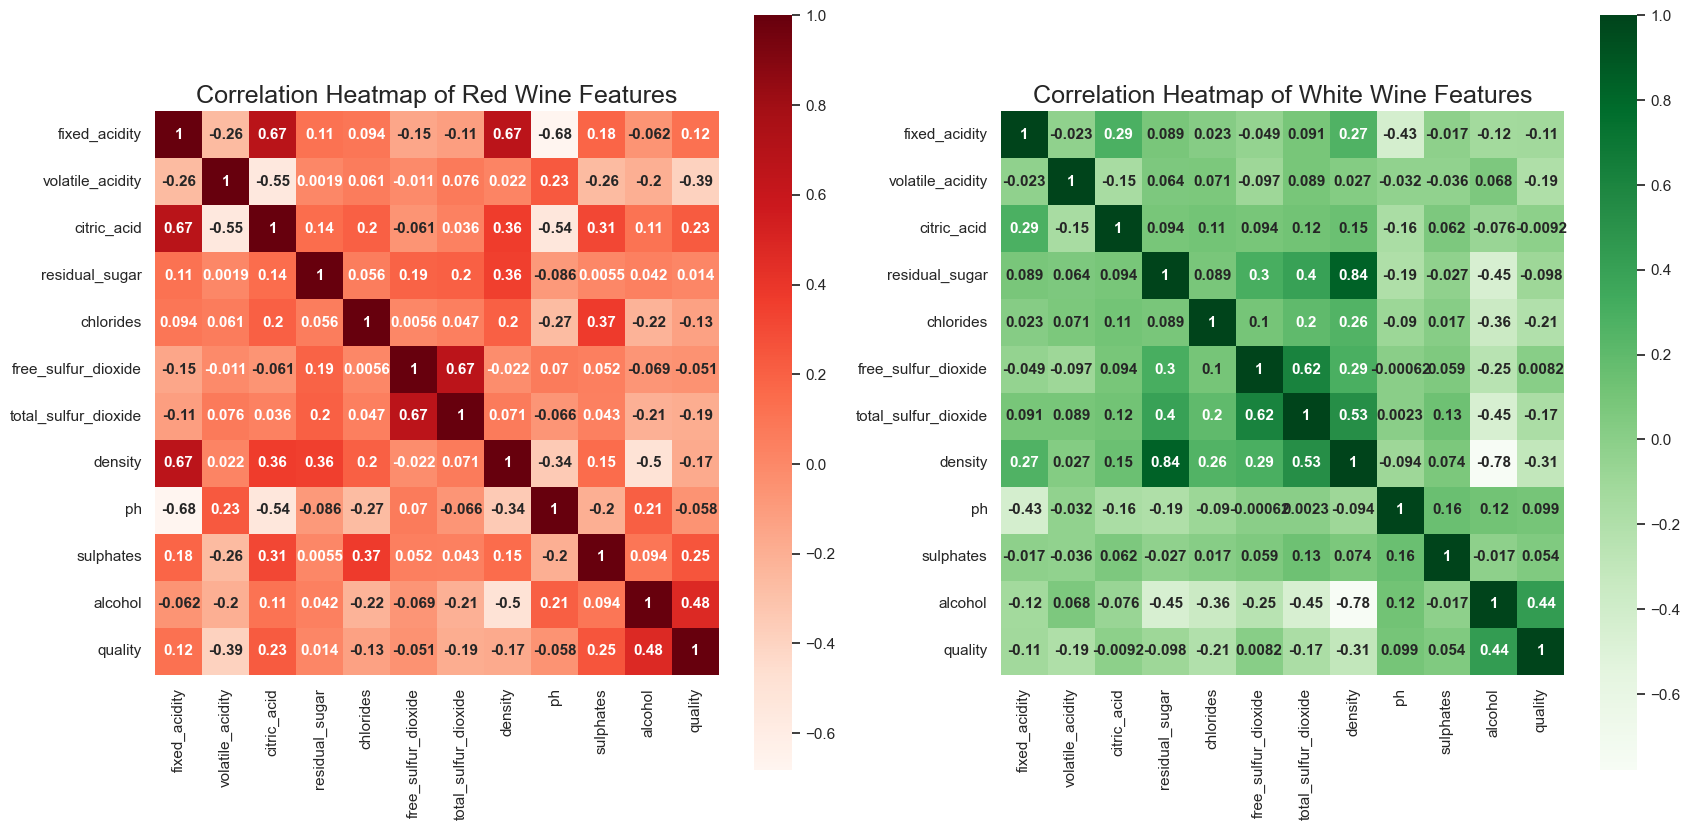

In [662]:
# create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))

# compute the correlation matrix for red wine dataset
red_corr = red_df.corr()

# plot the correlation matrix for red wine
sns.heatmap(red_corr,
            xticklabels=red_corr.columns.values,
            yticklabels=red_corr.columns.values,
            cmap='Reds', annot=True, annot_kws={'fontsize':11, 'fontweight':'bold'}, square=True,
            ax=ax1)
            

# set the title of the plot for red wine
ax1.set_title('Correlation Heatmap of Red Wine Features', fontsize=18)

# compute the correlation matrix for white wine dataset
white_corr = white_df.corr()

# plot the correlation matrix for white wine
sns.heatmap(white_corr,
            xticklabels=white_corr.columns.values,
            yticklabels=white_corr.columns.values,
            cmap='Greens', annot=True, annot_kws={'fontsize':11, 'fontweight':'bold'}, square=True,
            ax=ax2)
            

# set the title of the plot for white wine
ax2.set_title('Correlation Heatmap of White Wine Features', fontsize=18)

# show the plot
plt.show()

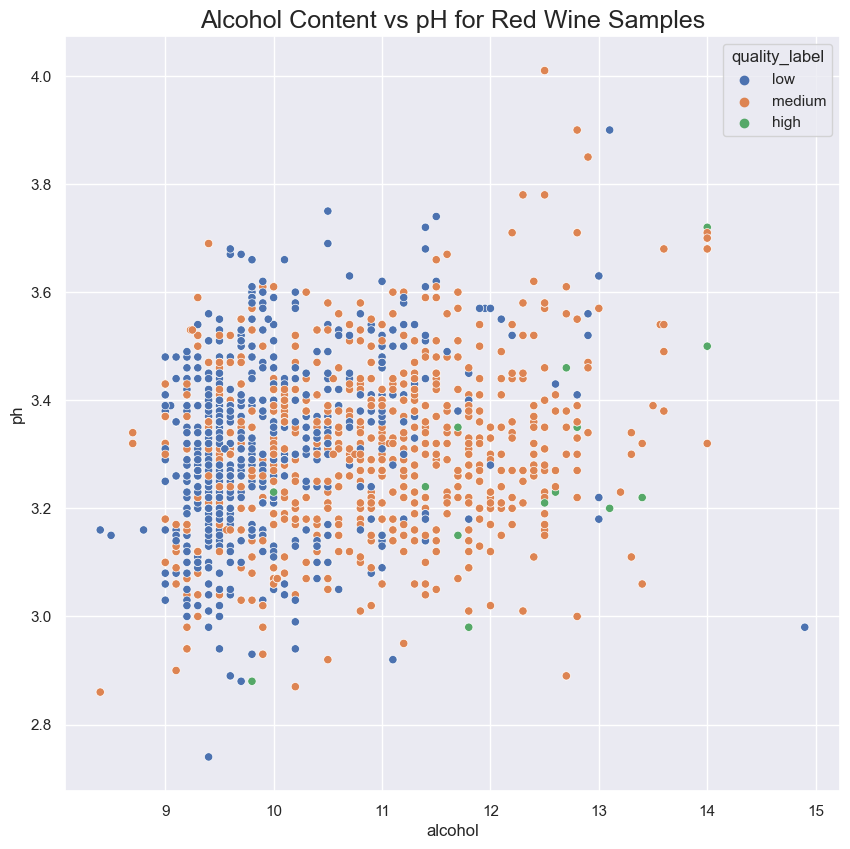

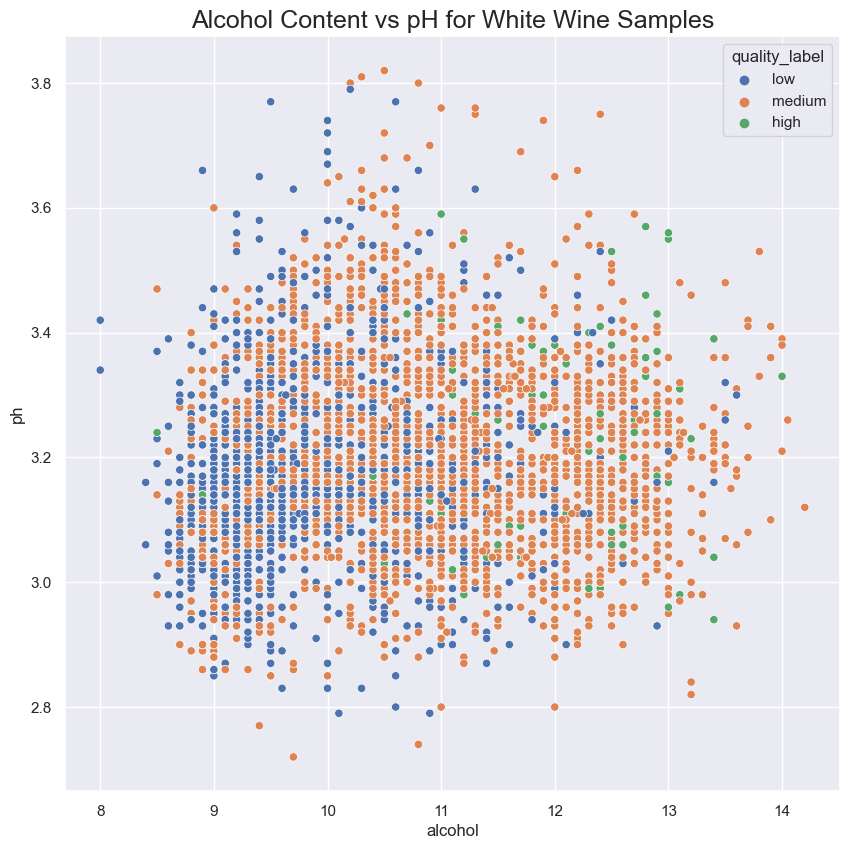

In [663]:
# use a scatterplot with 3 variables to visualize the relationship between the alcohol content, pH, and quality of red wine samples


# create a figure with a single subplot
fig, ax = plt.subplots(figsize=(10, 10))

# use a scatterplot to plot alcohol content vs pH
sns.scatterplot(data=red_df, x='alcohol', y='ph', hue='quality_label', ax=ax)

# set the title of the plot
ax.set_title('Alcohol Content vs pH for Red Wine Samples', fontsize=18)

# show the plot
plt.show()

# use a scatterplot with 3 variables to visualize the relationship between the alcohol content, pH, and quality of white wine samples


# create a figure with a single subplot
fig, ax = plt.subplots(figsize=(10, 10))


# use a scatterplot to plot alcohol content vs pH


sns.scatterplot(data=white_df, x='alcohol', y='ph', hue='quality_label', ax=ax)

# set the title of the plot

ax.set_title('Alcohol Content vs pH for White Wine Samples', fontsize=18)

# show the plot
plt.show()


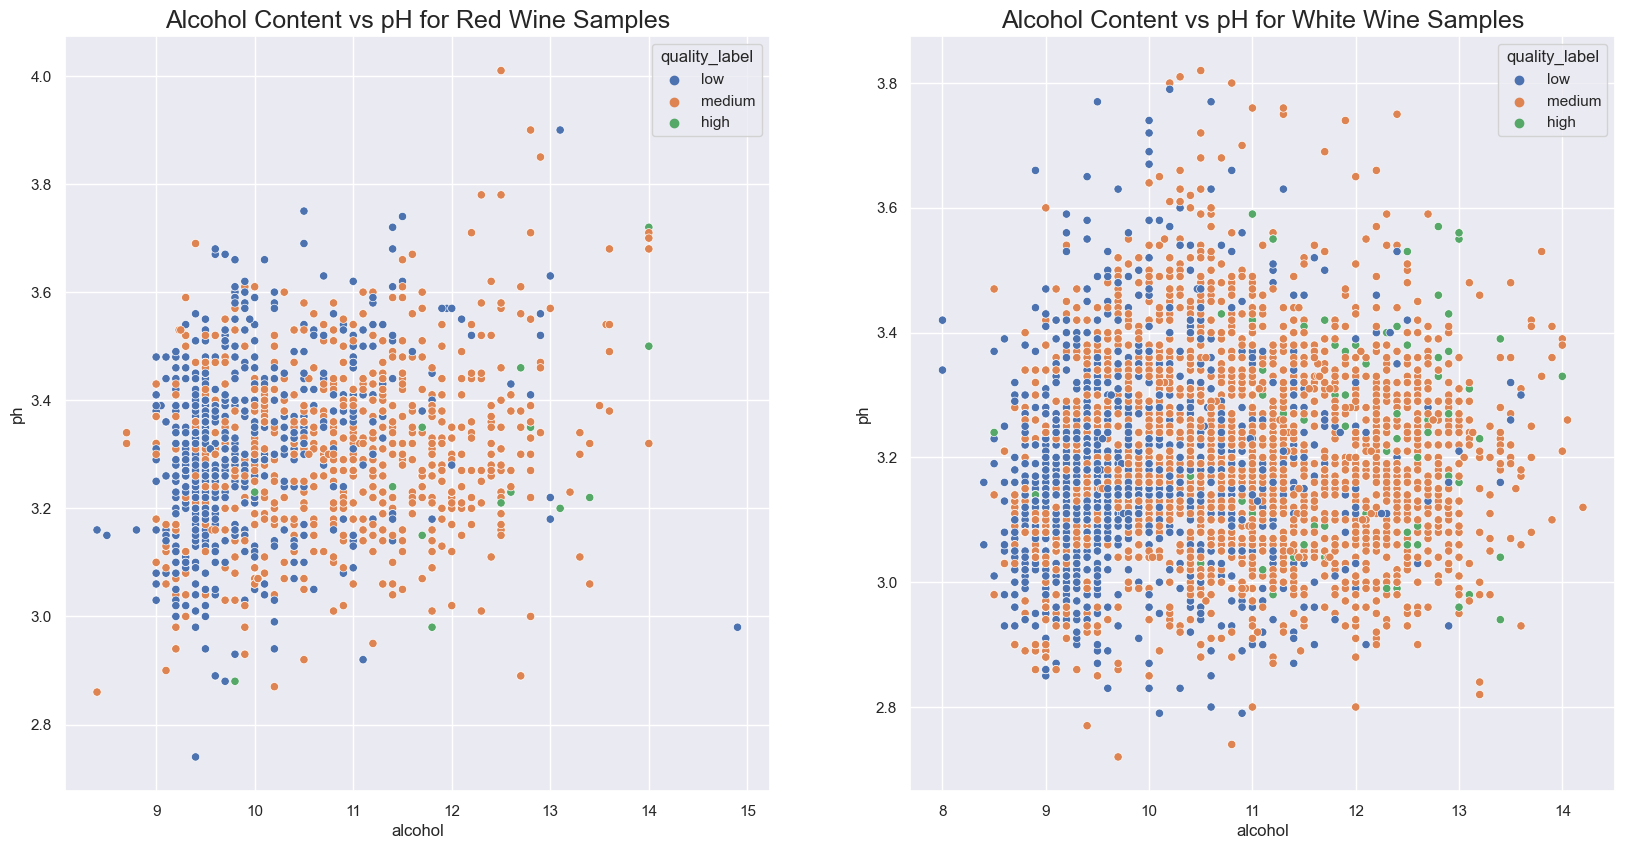

In [664]:

# create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))

# use a scatterplot to plot alcohol content vs pH for red wine
sns.scatterplot(data=red_df, x='alcohol', y='ph', hue='quality_label', ax=axs[0])
axs[0].set_title('Alcohol Content vs pH for Red Wine Samples', fontsize=18)

# use a scatterplot to plot alcohol content vs pH for white wine
sns.scatterplot(data=white_df, x='alcohol', y='ph', hue='quality_label', ax=axs[1])
axs[1].set_title('Alcohol Content vs pH for White Wine Samples', fontsize=18)

# show the plots
plt.show()

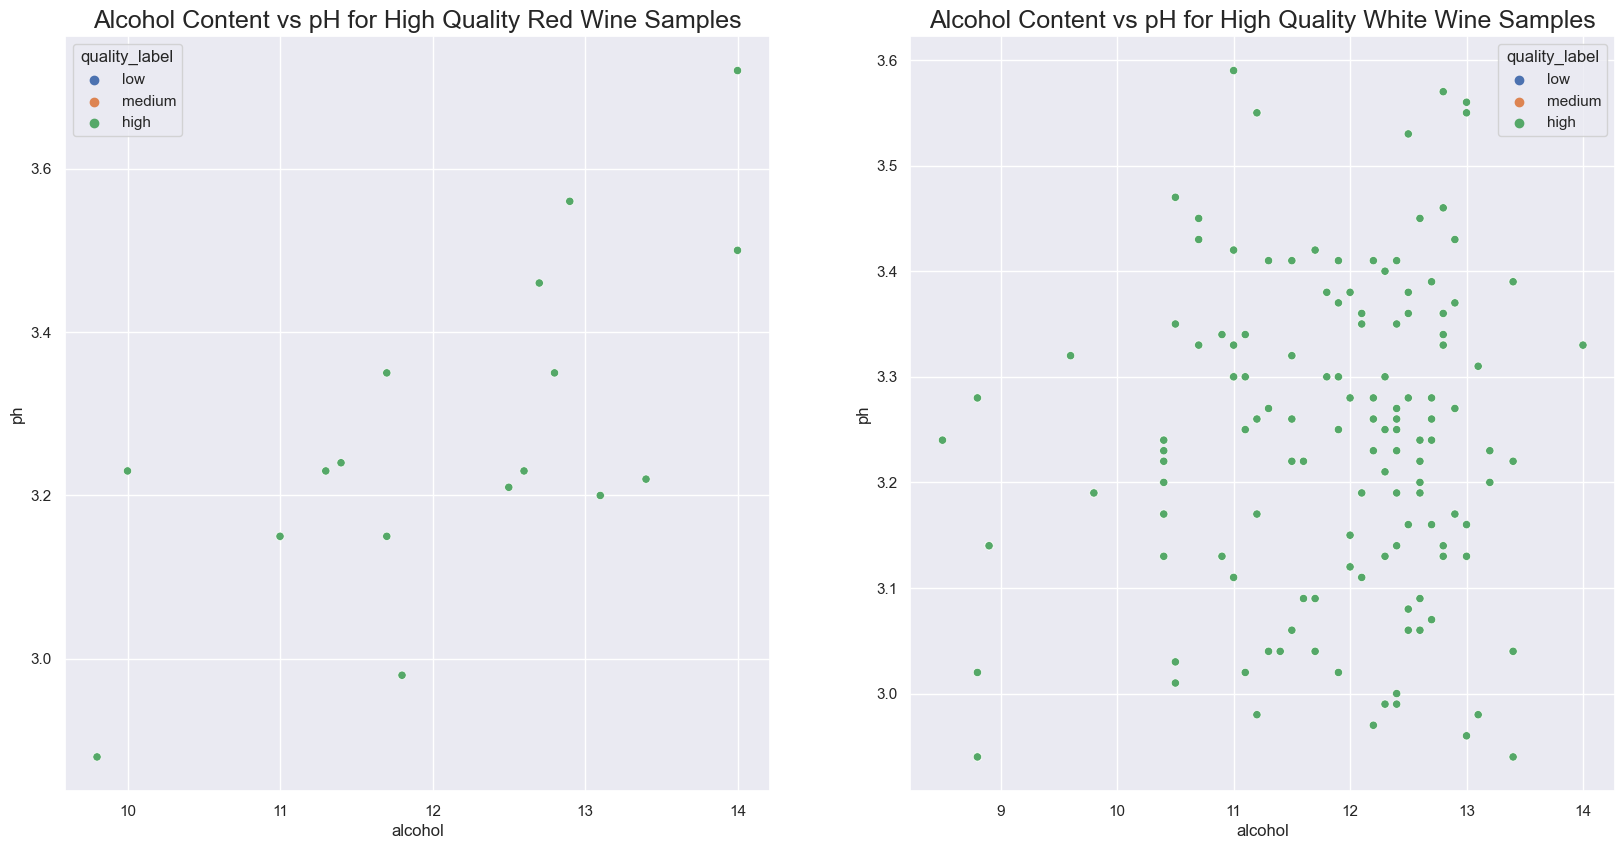

In [665]:
# create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))

# plot alcohol content vs pH for red wine with 'high' quality label
red_high = red_df.query("quality_label == 'high'")
sns.scatterplot(data=red_wine_high, x='alcohol', y='ph', hue='quality_label', ax=axs[0])
axs[0].set_title('Alcohol Content vs pH for High Quality Red Wine Samples', fontsize=18)

# plot alcohol content vs pH for white wine with 'high' quality label
white_high = white_df.query("quality_label == 'high'")
sns.scatterplot(data=white_wine_high, x='alcohol', y='ph', hue='quality_label', ax=axs[1])
axs[1].set_title('Alcohol Content vs pH for High Quality White Wine Samples', fontsize=18)

# show the plots
plt.show()

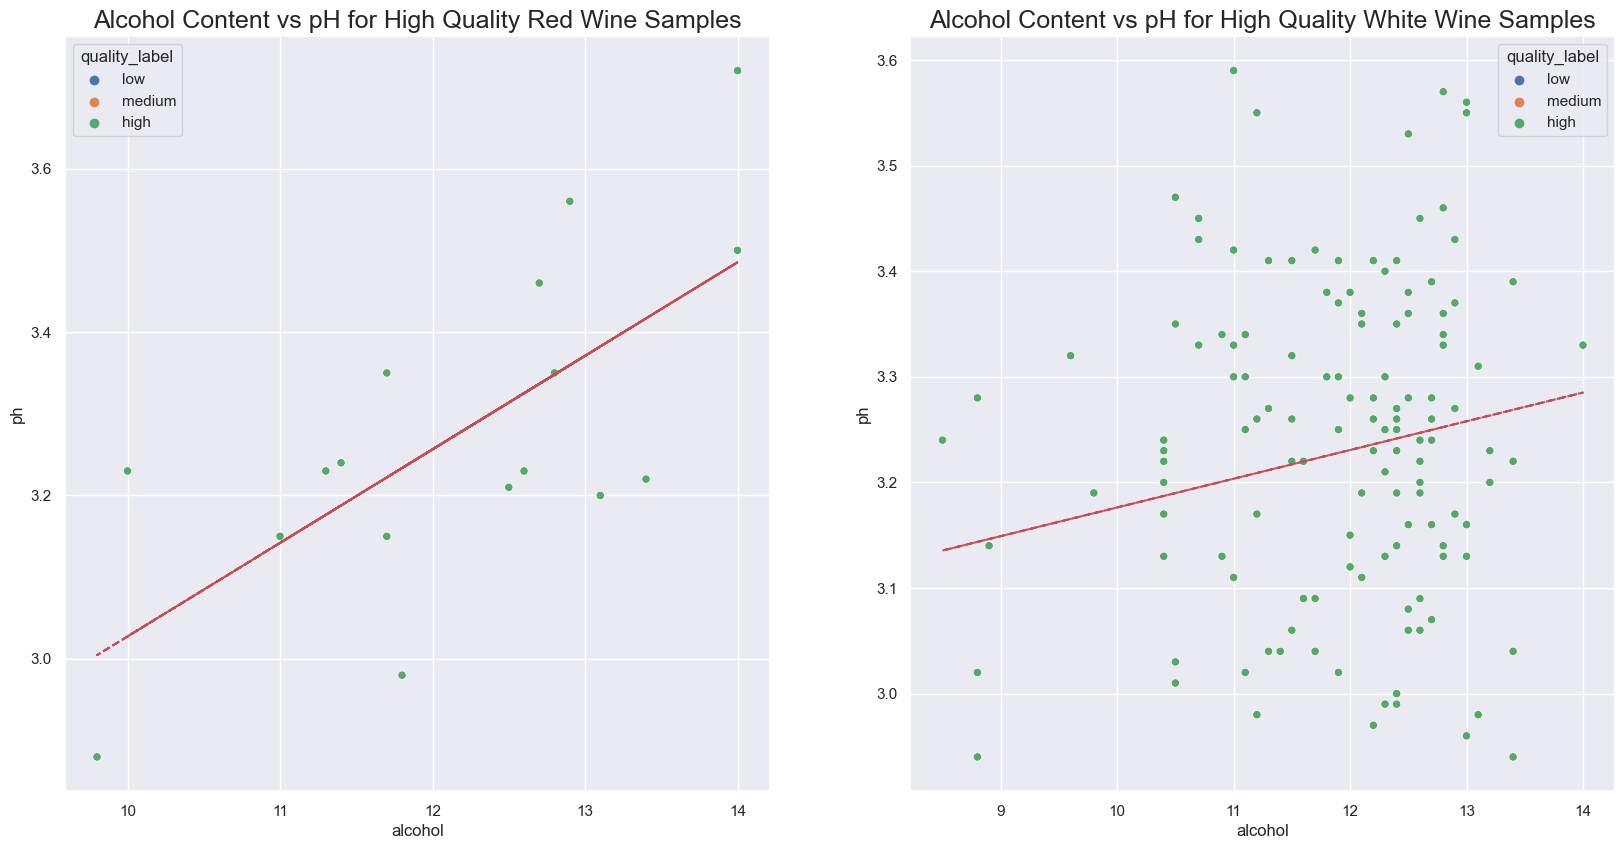

In [666]:
# create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))

# plot alcohol content vs pH for red wine with 'high' quality label and line of correlation
red_high = red_df.query("quality_label == 'high'")
sns.scatterplot(data=red_wine_high, x='alcohol', y='ph', hue='quality_label', ax=axs[0])
axs[0].set_title('Alcohol Content vs pH for High Quality Red Wine Samples', fontsize=18)
z_red = np.polyfit(red_wine_high['alcohol'], red_wine_high['ph'], 1)
p_red = np.poly1d(z_red)
axs[0].plot(red_wine_high['alcohol'], p_red(red_wine_high['alcohol']), "r--")

# plot alcohol content vs pH for white wine with 'high' quality label and line of correlation
white_high = white_df.query("quality_label == 'high'")
sns.scatterplot(data=white_wine_high, x='alcohol', y='ph', hue='quality_label', ax=axs[1])
axs[1].set_title('Alcohol Content vs pH for High Quality White Wine Samples', fontsize=18)
z_white = np.polyfit(white_wine_high['alcohol'], white_wine_high['ph'], 1)
p_white = np.poly1d(z_white)
axs[1].plot(white_wine_high['alcohol'], p_white(white_wine_high['alcohol']), "r--")

# show the plots
plt.show()

#### The regression line in the plot shows the linear relationship between alcohol content and pH for high-quality wines. The slope of the line indicates the direction and strength of the relationship between the two variables. If the line has a positive slope, it means that as one variable (alcohol content) increases, the other variable (pH) also tends to increase. If the line has a negative slope, it means that as one variable increases, the other tends to decrease. ####

#### The slope of the regression line in this plot shows a slight positive relationship between alcohol content and pH for high-quality wines, although the relationship appears to be weaker in the white wine plot than in the red wine plot. Overall, the regression line provides a visual summary of the relationship between two variables, allowing us to identify trends and patterns in the data. ####






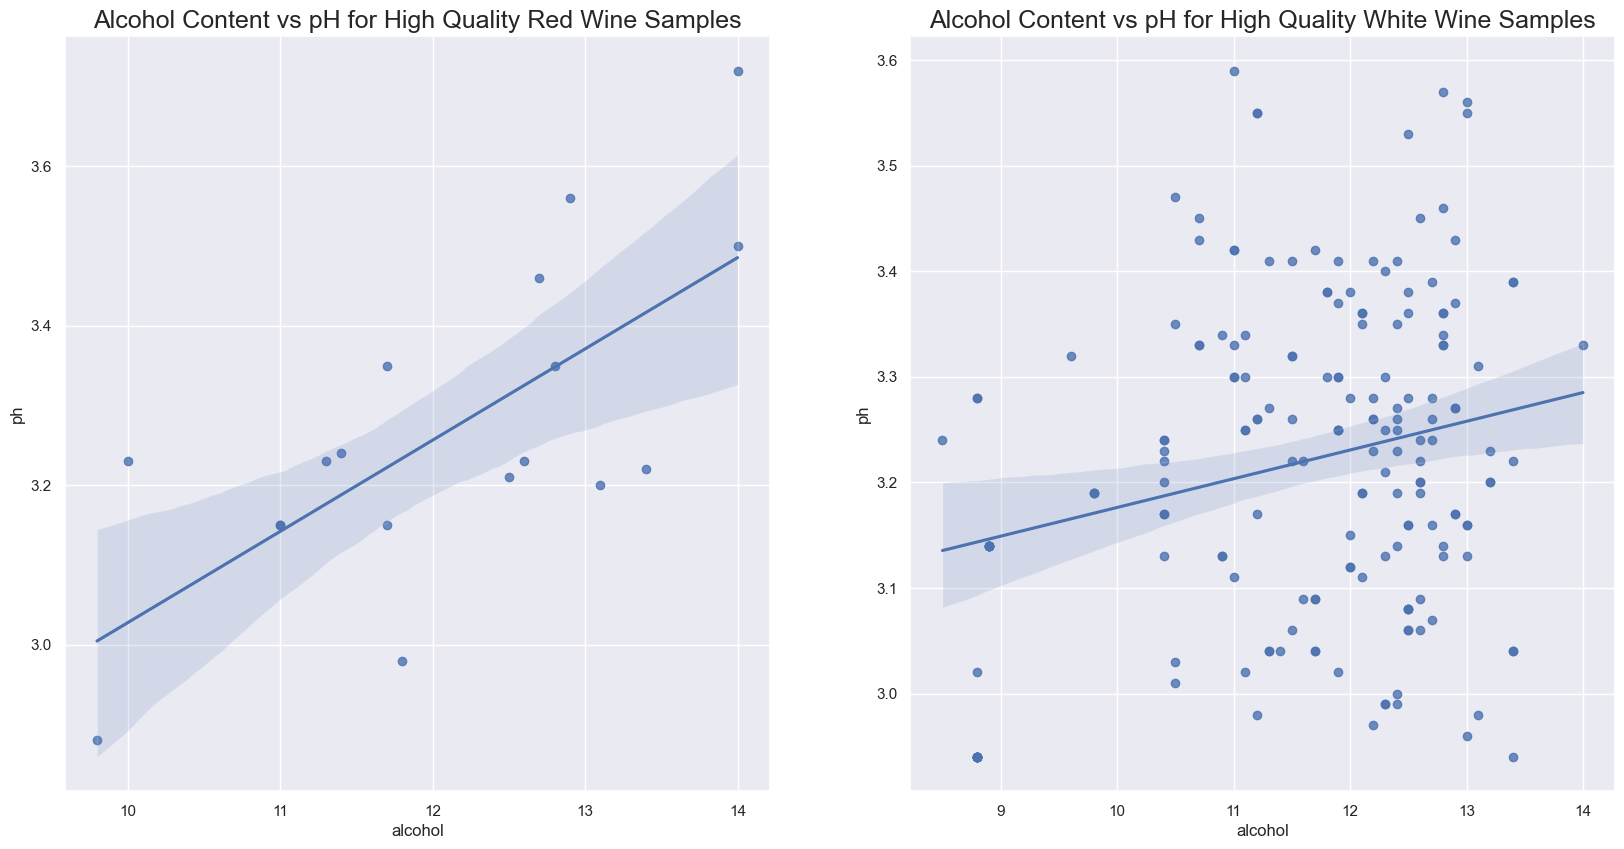

In [667]:
# create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))

# plot alcohol content vs pH for red wine with 'high' quality label and line of correlation
red_wine_high = red_df.query("quality_label == 'high'")
sns.regplot(data=red_wine_high, x='alcohol', y='ph', ax=axs[0])
axs[0].set_title('Alcohol Content vs pH for High Quality Red Wine Samples', fontsize=18)

# plot alcohol content vs pH for white wine with 'high' quality label and line of correlation
white_wine_high = white_df.query("quality_label == 'high'")
sns.regplot(data=white_wine_high, x='alcohol', y='ph', ax=axs[1])
axs[1].set_title('Alcohol Content vs pH for High Quality White Wine Samples', fontsize=18)

# show the plots
plt.show()

#### The area marked on the graph in this example represents the confidence interval of the regression line. A confidence interval is a range of values that we are fairly sure our true value lies in. In this case, the confidence interval shows the range of possible values for the average pH for a given alcohol content in high quality white or red wine samples. The shaded area represents the range of possible values for the true line that would fit the data well with a certain level of confidence (usually 95%).

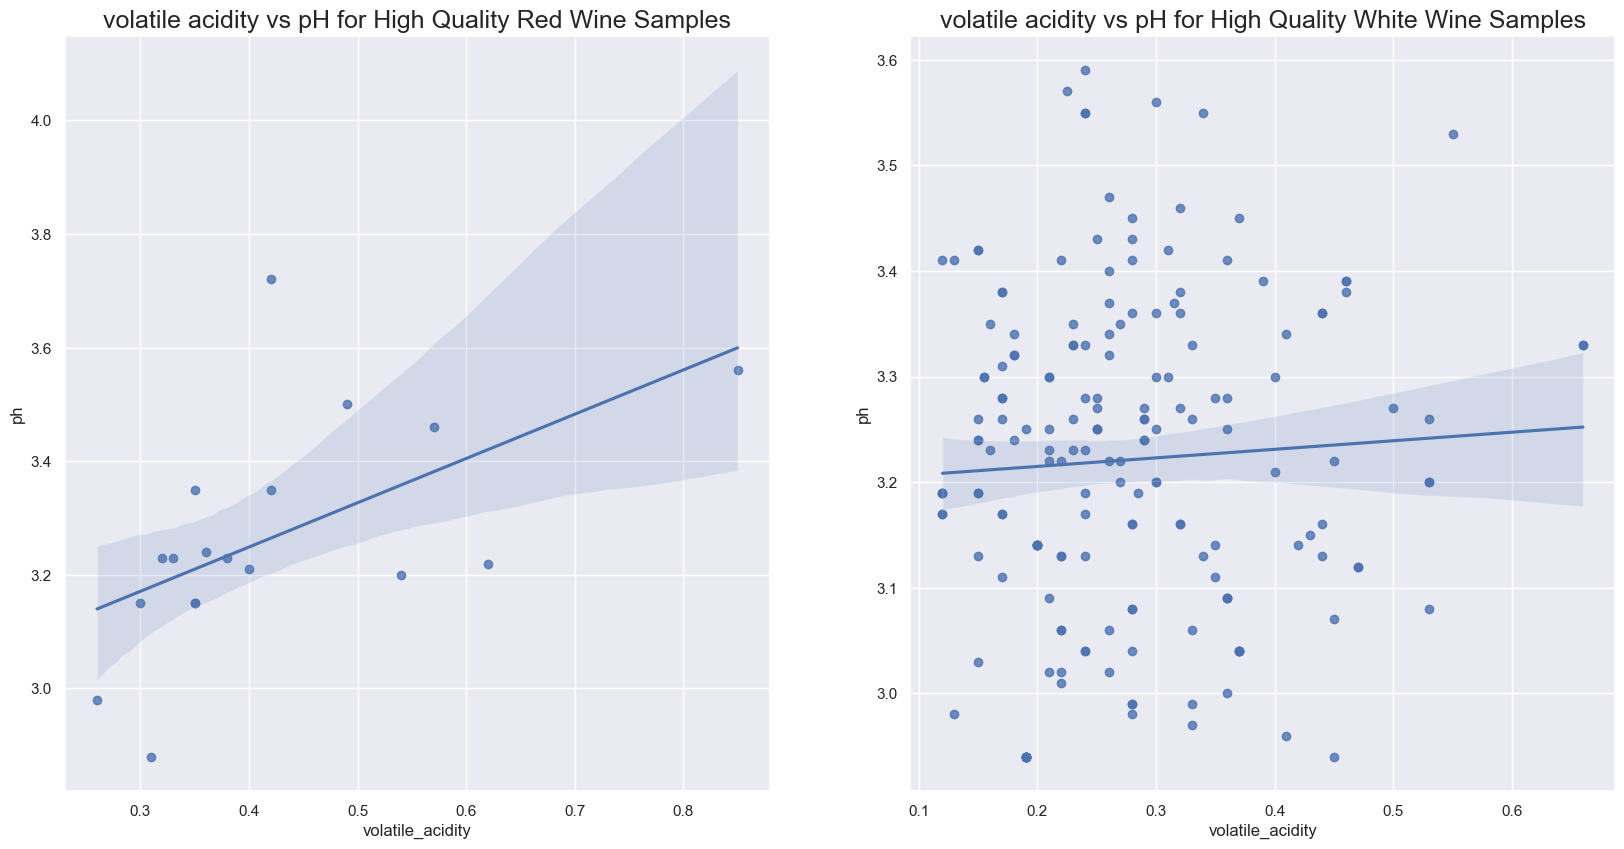

In [668]:
# produce more scatterplot for both red and white wines where you explore 3 variables at the same time.


# create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))

# plot volatile acidity vs pH for red wine with 'high' quality label and line of correlation


red_wine_high = red_df.query("quality_label == 'high'")
sns.regplot(data=red_wine_high, x='volatile_acidity', y='ph', ax=axs[0])
axs[0].set_title('volatile acidity vs pH for High Quality Red Wine Samples', fontsize=18)

# plot volatile acidity vs pH for white wine with 'high' quality label and line of correlation
white_wine_high = white_df.query("quality_label == 'high'")
sns.regplot(data=white_wine_high, x='volatile_acidity', y='ph', ax=axs[1])
axs[1].set_title('volatile acidity vs pH for High Quality White Wine Samples', fontsize=18)

# show the plots
plt.show()

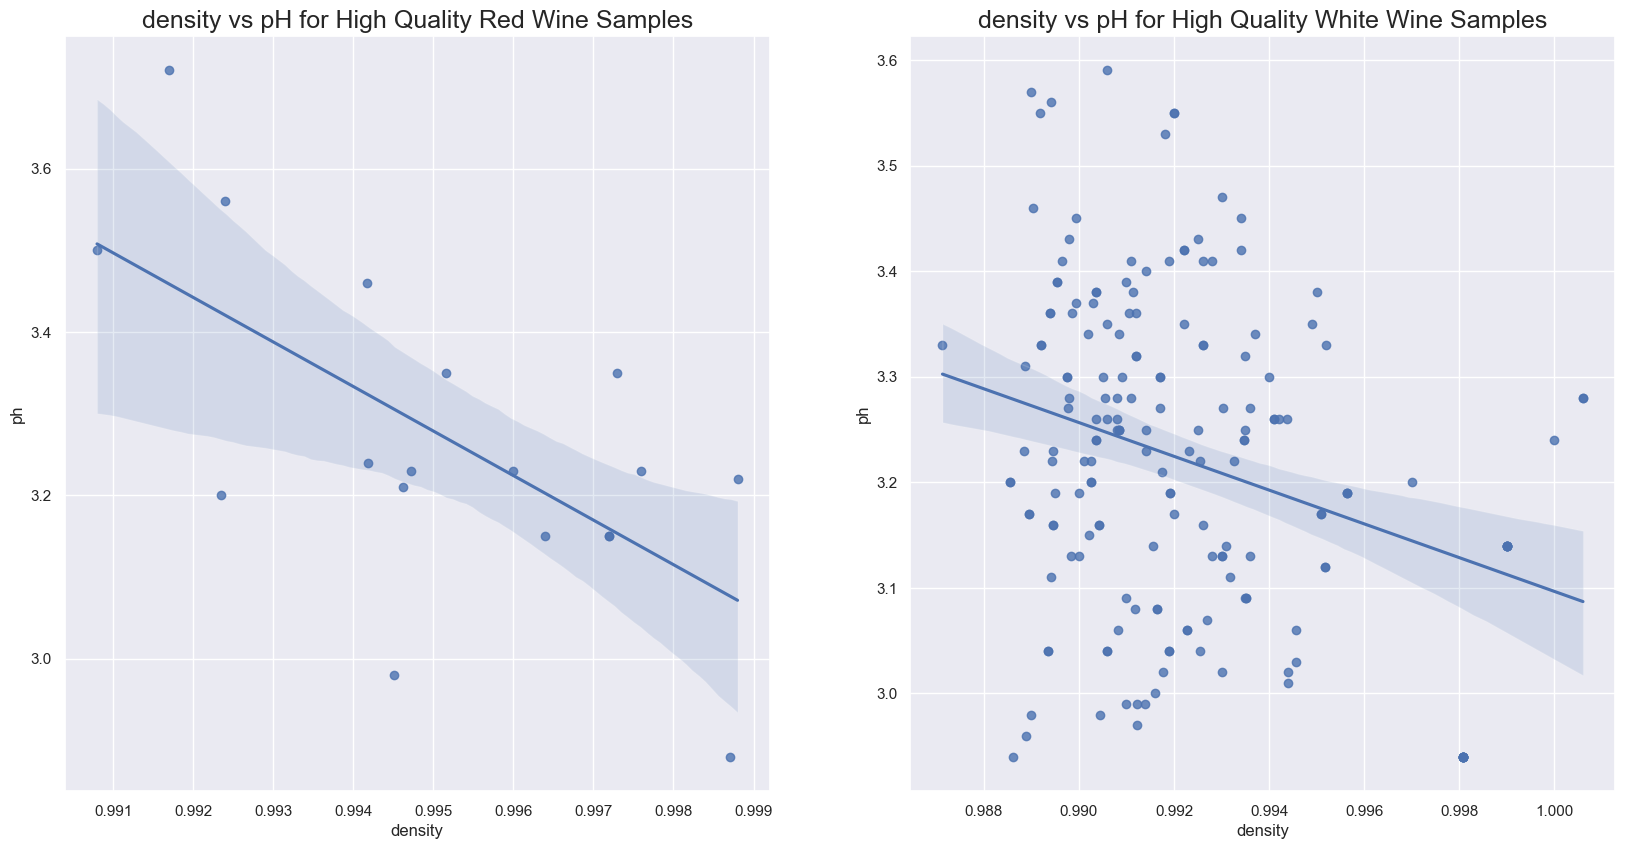

In [669]:
# produce more scatterplot for both red and white wines where you explore 3 variables at the same time.


# create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))

# plot density vs pH for red wine with 'high' quality label and line of correlation


red_wine_high = red_df.query("quality_label == 'high'")
sns.regplot(data=red_wine_high, x='density', y='ph', ax=axs[0])
axs[0].set_title('density vs pH for High Quality Red Wine Samples', fontsize=18)

# plot density vs pH for white wine with 'high' quality label and line of correlation
white_wine_high = white_df.query("quality_label == 'high'")
sns.regplot(data=white_wine_high, x='density', y='ph', ax=axs[1])
axs[1].set_title('density vs pH for High Quality White Wine Samples', fontsize=18)

# show the plots
plt.show()

<center><h2>Statistical Significance</center></h2>

<body>This is a branch of inferential statistics which draws inferences and propositions of a population using a data sample. The idea is to use statistical methods and models to draw statistical inferences from a given hypotheses. 
<b>Each hypothesis consists of a null hypothesis and an alternative hypothesis.</b>

</body>

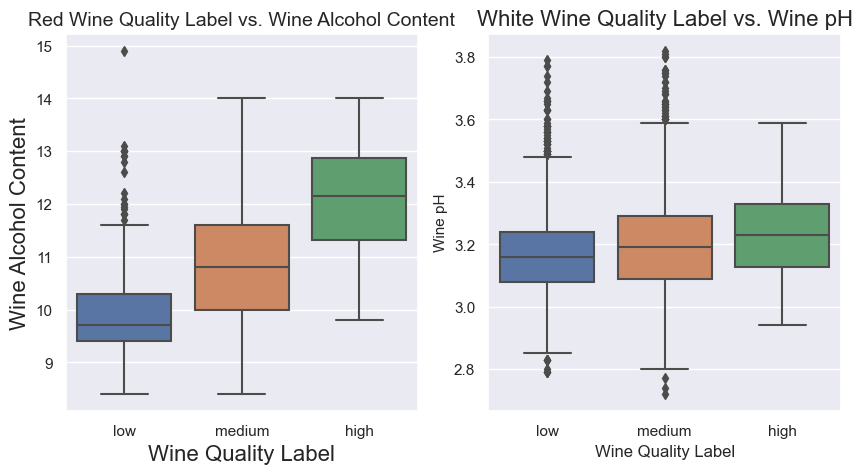

In [670]:
# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# Create first boxplot with wine alcohol content and quality for red wine
sns.boxplot(x='quality_label', y='alcohol', data=red_wine_quality, ax=ax1)
ax1.set_title('Red Wine Quality Label vs. Wine Alcohol Content', fontsize=14)
ax1.set_xlabel('Wine Quality Label', fontsize=16)
ax1.set_ylabel('Wine Alcohol Content', fontsize=16)

# Create second boxplot with wine pH and quality for white wine
sns.boxplot(x='quality_label', y='ph', data=white_wine_quality, ax=ax2)
ax2.set_title('White Wine Quality Label vs. Wine pH', fontsize=16)
ax2.set_xlabel('Wine Quality Label', fontsize=12)
ax2.set_ylabel('Wine pH', fontsize=11)

plt.show()

<center><h3>ANOVA test for mean alcohol levels across red wine samples with different quality ratings</center></h3>

In [671]:
F, p = stats.f_oneway(red_df[red_df['quality_label'] == 'low']['alcohol'],
red_df[red_df['quality_label'] == 'medium']['alcohol'],
red_df[red_df['quality_label'] == 'high']['alcohol'])
print('ANOVA test for mean alcohol levels across red wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean alcohol levels across red wine samples with different quality ratings
F Statistic: 205.23448800361507 	p-value: 4.776936653588672e-80


In [672]:
F, p = stats.f_oneway(white_df[white_df['quality_label'] == 'low']['alcohol'],
white_df[white_df['quality_label'] == 'medium']['alcohol'],
white_df[white_df['quality_label'] == 'high']['alcohol'])
print('ANOVA test for mean alcohol levels across red wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean alcohol levels across red wine samples with different quality ratings
F Statistic: 478.1628922043277 	p-value: 2.0647901873531918e-190


<body>The p-value is less than 0.05 in the first test. 
This tells us that there is a statistically significant difference in alcohol level means for at least two groups out of the three (hence, rejecting the null hypothesis in favor of the alternative).

The p-value is a measure of the evidence against the null hypothesis. In statistical hypothesis testing, the null hypothesis is assumed to be true unless there is sufficient evidence to reject it. The p-value is the probability of obtaining a test statistic as extreme or more extreme than the one observed, assuming the null hypothesis is true.

In this case, the p-value is an extremely small number (2.0647901873531918e-190), which means that the evidence against the null hypothesis is very strong. Specifically, it means that the probability of observing a test statistic as extreme or more extreme than the one observed, assuming the null hypothesis is true, is almost zero. This provides strong evidence to reject the null hypothesis and suggests that there is a significant difference between the groups being compared.
</body>

<center><h2>Predictive modelling</center><h2>

<b> Encoding categorical variables </b>

In [673]:
# Get one hot encoding of columns Type
encoded = pd.get_dummies(wine_concat['type'])
encoded
# replace type column with the two encoded columns
wine_concat = pd.concat([wine_concat, encoded], axis=1)
# drop the original type column (axis=1 refers to the columns)
wine_concat = wine_concat.drop('type', axis=1)
# print the first five rows of the data 
wine_concat.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,quality_label,red,white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,1,0


In [679]:
wine_concat 

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,quality_label,red,white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium,0,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low,0,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium,0,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium,0,1


In [680]:
# import the train_test_split function
# from sklearn.model_selection import train_test_split ---- already imported

# separate the data from the target attributes
X = wine_concat.drop(['quality_label', 'quality'], axis=1)
y = wine_concat['quality_label']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)

# print the shape of X_train and X_test
print(X_train.shape, X_test.shape)

# print the shape of y_train and y_test
print(y_train.shape, y_test.shape)



(4872, 13) (1625, 13)
(4872,) (1625,)


In [687]:
X_test 

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,red,white
3126,7.2,0.17,0.37,6.9,0.059,47.0,128.0,0.99322,3.08,0.46,11.0,0,1
592,6.9,0.41,0.33,10.1,0.043,28.0,152.0,0.99680,3.20,0.52,9.4,0,1
2712,6.4,0.21,0.44,7.4,0.045,47.0,182.0,0.99570,3.24,0.46,9.1,0,1
3018,6.8,0.22,0.31,6.9,0.037,33.0,121.0,0.99176,3.02,0.39,11.9,0,1
114,7.8,0.56,0.19,1.8,0.104,12.0,47.0,0.99640,3.19,0.93,9.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,6.6,0.22,0.29,14.4,0.046,39.0,118.0,0.99834,3.05,0.50,9.1,0,1
2875,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,0,1
1093,8.4,0.17,0.31,6.7,0.038,29.0,132.0,0.99450,3.10,0.32,10.6,0,1
691,9.2,0.92,0.24,2.6,0.087,12.0,93.0,0.99980,3.48,0.54,9.8,1,0


In [692]:
# Select a machine learning algorithm to train on the data
# use the sklearn library to create and train a model.
# import the LogisticRegression classifier from the sklearn.linear_model library

#from sklearn.linear_model import LogisticRegression

# create a logistic regression model
logreg = LogisticRegression()

# fit the model to the training data
logreg.fit(X_train, y_train)

AttributeError: 'LogisticRegression' object has no attribute '_validate_params'

In [694]:
# use 'Linear Discriminant Analysis' to create a model
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# create a model
lda = LinearDiscriminantAnalysis()

# fit the model to the training data
lda.fit(X_train, y_train)


NameError: name 'LinearDiscriminantAnalysis' is not defined

In [702]:
# use SVC to create a model
#from sklearn.svm import SVC

# create a model
svc = SVC()

# fit the model to the training data
svc.fit(X_train, y_train)

AttributeError: 'SVC' object has no attribute '_validate_params'

In [695]:
# use 'K Nearest Neighbors' to create a model
#from sklearn.neighbors import KNeighborsClassifier

# create a model
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model to the training data
knn.fit(X_train, y_train)

NameError: name 'KNeighborsClassifier' is not defined

In [676]:
wine_concat['quality_label'].value_counts()

medium    3915
low       2384
high       198
Name: quality_label, dtype: int64

In [696]:
# use Decision Tree Classifier
#from sklearn.tree import DecisionTreeClassifier

# create a model
dt = DecisionTreeClassifier()

# fit the model to the training data
dt.fit(X_train, y_train)

NameError: name 'DecisionTreeClassifier' is not defined

In [697]:
# use SGD Classifier
#from sklearn.linear_model import SGDClassifier

# create a model
sgd = SGDClassifier()

# fit the model to the training data
sgd.fit(X_train, y_train)


AttributeError: 'SGDClassifier' object has no attribute '_validate_params'

In [698]:
# use Random Forest Classifier
#from sklearn.ensemble import RandomForestClassifier

# create a model
rf = RandomForestClassifier()

# fit the model to the training data
rf.fit(X_train, y_train)

NameError: name 'RandomForestClassifier' is not defined

In [699]:
# Gradient Boosting Classifier
#from sklearn.ensemble import GradientBoostingClassifier

# create a model
gb = GradientBoostingClassifier()

# fit the model to the training data
gb.fit(X_train, y_train)


NameError: name 'GradientBoostingClassifier' is not defined

In [ ]:
wine_concat['quality_label'].value_counts(normalize=True)

In [700]:
# use Linear SVC
#from sklearn.svm import LinearSVC

# create a model
lsvc = LinearSVC()

# fit the model to the training data
lsvc.fit(X_train, y_train)


AttributeError: 'LinearSVC' object has no attribute '_validate_params'

In [701]:
# use Gaussian NB
#from sklearn.naive_bayes import GaussianNB

# create a model
gnb = GaussianNB()

# fit the model to the training data
gnb.fit(X_train, y_train)


AttributeError: 'GaussianNB' object has no attribute '_validate_params'

In [ ]:
# apply the transform method of the scaler object to the test data
X_test_scaled = scaler.transform(X_test)

# print the mean and standard deviation of the test data
print('Mean:', np.mean(X_test_scaled, axis=0))
print('Standard Deviation:', np.std(X_test_scaled, axis=0))



In [ ]:
# import the LogisticRegression class
# from sklearn.linear_model import LogisticRegression ---- already imported

# create an instance of the LogisticRegression class
log_reg = LogisticRegression()

# fit the model on the training data
log_reg.fit(X_train_scaled, y_train)

# make predictions on the test data
y_pred = log_reg.predict(X_test_scaled)



In [ ]:
# import the accuracy_score function
# from sklearn.metrics import accuracy_score ---- already imported

# print the accuracy score
print('Accuracy:', accuracy_score(y_test, y_pred))



In [ ]:
# import the confusion_matrix function
# from sklearn.metrics import confusion_matrix ---- already imported

# print the confusion matrix
print(confusion_matrix(y_test, y_pred))



In [ ]:
# import the classification_report function
# from sklearn.metrics import classification_report ---- already imported

# print the classification report
print(classification_report(y_test, y_pred))



In [ ]:
# import the cross_val_score function
# from sklearn.model_selection import cross_val_score ---- already imported

# create a new logistic regression model
log_reg = LogisticRegression()

# perform 5-fold cross-validation
cv_scores = cross_val_score(log_reg, X, y, cv=5)

# print the 5-fold cross-validation scores
print(cv_scores)

# print the mean cross-validation score
print('Mean Cross-Validation Score:', np.mean(cv_scores))



In [ ]:
# import the GridSearchCV class
# from sklearn.model_selection import GridSearchCV ---- already imported

# create a dictionary with hyperparameters and possible values
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000]}
# create a new logistic regression model
log_reg = LogisticRegression()
# create a grid search object
grid_search = GridSearchCV(log_reg, param_grid, cv=5, verbose=0)
# fit the model on the training data
grid_search.fit(X_train_scaled, y_train)

# print the best parameters
print('Best C:', grid_search.best_estimator_.get_params()['C'])

# print the best score
print('Best Score:', grid_search.best_score_)

# print the best estimator
print('Best Estimator:', grid_search.best_estimator_)
# print the best model
print('Best Model:', grid_search.best_estimator_.coef_)
# print the best model parameters
print('Best Model Parameters:', grid_search.best_params_)
# print the best model score
print('Best Model Score:', grid_search.best_score_)
# print the best model index
print('Best Model Index:', grid_search.best_index_)

